In [899]:
print("\n=== Research Question and Hypothesis ===")
research_question = """
Research Question: Can we predict the likelihood of diabetes based on lifestyle factors and health history?

Hypothesis:
H0: There is no significant relationship between lifestyle factors and diabetes diagnosis
H1: There is a significant relationship between lifestyle factors and diabetes diagnosis

Key Factors to Investigate:
1. BMI and its relationship with diabetes
2. Age as a risk factor
3. Physical activity levels
4. Health risk behaviors (smoking, alcohol consumption)
5. Socioeconomic factors (income, education)
"""

print(research_question)


=== Research Question and Hypothesis ===

Research Question: Can we predict the likelihood of diabetes based on lifestyle factors and health history?

Hypothesis:
H0: There is no significant relationship between lifestyle factors and diabetes diagnosis
H1: There is a significant relationship between lifestyle factors and diabetes diagnosis

Key Factors to Investigate:
1. BMI and its relationship with diabetes
2. Age as a risk factor
3. Physical activity levels
4. Health risk behaviors (smoking, alcohol consumption)
5. Socioeconomic factors (income, education)



In [900]:
pip install pandas numpy matplotlib seaborn scikit-learn scipy

Note: you may need to restart the kernel to use updated packages.


In [901]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [902]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [903]:
sns.set_style("darkgrid")
sns.set_palette("husl")

In [904]:
print("Section 1: Imports and Setup completed successfully!")

Section 1: Imports and Setup completed successfully!


In [905]:
df = pd.read_csv('diabetes_diagnosis.csv')

In [906]:
df.head()

Unnamed: 0  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0           0        NaN  40.0     NaN     NaN                   0.0   
1           1        NaN  25.0     NaN     0.0                   0.0   
2           2        NaN   NaN     NaN     0.0                   0.0   
3           3        1.0  27.0     NaN     0.0                   NaN   
4           4        NaN  24.0     NaN     NaN                   0.0   

   PhysActivity  Fruits  Veggies  AnyHealthcare  ...  Physical (days)  \
0           NaN     NaN      NaN            1.0  ...             15.0   
1           NaN     0.0      NaN            0.0  ...              NaN   
2           NaN     NaN      NaN            NaN  ...              NaN   
3           NaN     NaN      NaN            NaN  ...              NaN   
4           NaN     NaN      NaN            NaN  ...              0.0   

  DiffWalk     Sex   Age             Education   Income  Diabetes  \
0      NaN     NaN  63.0  High school graduate  $73,106        No   
1      NaN  Female  54.0      College graduate  $22,322        No   
2      1.0     NaN   NaN  High school graduate  $29,097        No   
3      0.0     NaN  74.0      Some high school  $55,498        No   
4      0.0  Female   NaN          Some college  $15,629        No   

  BloodPressure Cholesterol Alcoholic  
0           Yes         Yes        No  
1            No          No        No  
2           Yes         Yes       NaN  
3           Yes          No        No  
4           Yes         NaN        No  

[5 rows x 23 columns]

In [907]:
# Move Diabetes_Binary to the end
cols = df.columns.tolist()
cols.remove('Diabetes')
cols.append('Diabetes')
df = df[cols]

df.tail(15)

Unnamed: 0  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
264787      264787        1.0  22.0     0.0     NaN                   0.0   
264788      264788        1.0  28.0     NaN     NaN                   NaN   
264789      264789        1.0  29.0     0.0     NaN                   NaN   
264790      264790        1.0  24.0     0.0     NaN                   NaN   
264791      264791        1.0   NaN     NaN     NaN                   0.0   
264792      264792        1.0  27.0     0.0     NaN                   0.0   
264793      264793        NaN  25.0     NaN     NaN                   0.0   
264794      264794        1.0  23.0     NaN     NaN                   0.0   
264795      264795        NaN  22.0     0.0     0.0                   NaN   
264796      264796        NaN  22.0     NaN     0.0                   0.0   
264797      264797        NaN  28.0     1.0     0.0                   NaN   
264798      264798        1.0  27.0     NaN     0.0                   NaN   
264799      264799        NaN  26.0     NaN     NaN                   0.0   
264800      264800        1.0  23.0     NaN     NaN                   0.0   
264801      264801        NaN  37.0     NaN     0.0                   NaN   

        PhysActivity  Fruits  Veggies  AnyHealthcare  ...  Physical (days)  \
264787           NaN     NaN      NaN            1.0  ...              NaN   
264788           NaN     NaN      NaN            1.0  ...              0.0   
264789           NaN     0.0      0.0            NaN  ...              4.0   
264790           NaN     NaN      NaN            NaN  ...            -30.0   
264791           NaN     1.0      1.0            NaN  ...              NaN   
264792           1.0     1.0      NaN            NaN  ...              NaN   
264793           NaN     NaN      NaN            NaN  ...              0.0   
264794           NaN     NaN      1.0            NaN  ...              NaN   
264795           NaN     NaN      1.0            NaN  ...              NaN   
264796           NaN     1.0      1.0            1.0  ...              0.0   
264797           NaN     NaN      1.0            NaN  ...              NaN   
264798           1.0     NaN      NaN            1.0  ...              0.0   
264799           NaN     NaN      1.0            NaN  ...              NaN   
264800           NaN     0.0      NaN            1.0  ...              0.0   
264801           NaN     0.0      NaN            1.0  ...              NaN   

       DiffWalk     Sex    Age             Education   Income  BloodPressure  \
264787      NaN  Female   56.0      College graduate  $38,649             No   
264788      NaN     NaN   81.0      College graduate  $36,660            NaN   
264789      1.0     NaN   53.0      College graduate  $13,091            Yes   
264790      0.0    Male    NaN  High school graduate  $44,919            Yes   
264791      NaN    Male    NaN  High school graduate  $12,532            Yes   
264792      NaN    Male   41.0                   NaN      NaN            Yes   
264793      NaN     NaN    NaN                   NaN  $30,765             No   
264794      0.0    Male   63.0  High school graduate  $49,511             No   
264795      NaN     NaN   29.0      College graduate  $16,453             No   
264796      0.0    Male   28.0      College graduate  $16,384            NaN   
264797      0.0     NaN   63.0      College graduate  $14,166            NaN   
264798      NaN    Male   75.0          Some college  $29,621            Yes   
264799      NaN  Female -163.0      College graduate  $38,234            NaN   
264800      NaN  Female    NaN      College graduate  $15,659             No   
264801      0.0     NaN   48.0  High school graduate  $63,709             No   

       Cholesterol Alcoholic  Diabetes  
264787          No        No        No  
264788         NaN        No  Diabetes  
264789          No        No        No  
264790         Yes       NaN        No  
264791          No        No        No  

In [908]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264802 entries, 0 to 264801
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            264802 non-null  int64  
 1   CholCheck             113865 non-null  float64
 2   BMI                   177418 non-null  float64
 3   Smoker                145642 non-null  float64
 4   Stroke                105921 non-null  float64
 5   HeartDiseaseorAttack  193306 non-null  float64
 6   PhysActivity          76793 non-null   float64
 7   Fruits                103273 non-null  float64
 8   Veggies               95329 non-null   float64
 9   AnyHealthcare         82089 non-null   float64
 10  NoDocbcCost           66201 non-null   float64
 11  GeneralHealth         195954 non-null  object 
 12  Mental (days)         135050 non-null  float64
 13  Physical (days)       121809 non-null  float64
 14  DiffWalk              121809 non-null  float64
 15  

In [909]:
print("\n=== Basic Data Information ===")
print("\nDataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Statistics:\n", df.describe())


=== Basic Data Information ===

Dataset Shape: (264802, 23)

Columns: ['Unnamed: 0', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'GeneralHealth', 'Mental (days)', 'Physical (days)', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'BloodPressure', 'Cholesterol', 'Alcoholic', 'Diabetes']

Data Types:
 Unnamed: 0                int64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
AnyHealthcare           float64
NoDocbcCost             float64
GeneralHealth            object
Mental (days)           float64
Physical (days)         float64
DiffWalk                float64
Sex                      object
Age                     float64
Education                object
Income                   object


In [910]:
df.loc[(df["Age"] < 0) | (df["Age"] > 100), "Age"] = np.nan
df.loc[(df["Smoker"] < 0) | (df["Smoker"] > 1), "Smoker"] = np.nan
df.loc[(df["Fruits"] < 0) | (df["Fruits"] > 1), "Fruits"] = np.nan
df.loc[(df["Mental (days)"] < 0) | (df["Mental (days)"] > 31), "Mental (days)"] = np.nan
df.loc[(df["Physical (days)"] < 0) | (df["Physical (days)"] > 31), "Physical (days)"] = np.nan
df.loc[(df["BMI"] < 0) | (df["BMI"] > 60), "BMI"] = np.nan

In [911]:
print("\n=== Basic Data Information ===")
print("\nDataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Statistics:\n", df.describe())


=== Basic Data Information ===

Dataset Shape: (264802, 23)

Columns: ['Unnamed: 0', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'GeneralHealth', 'Mental (days)', 'Physical (days)', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'BloodPressure', 'Cholesterol', 'Alcoholic', 'Diabetes']

Data Types:
 Unnamed: 0                int64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
AnyHealthcare           float64
NoDocbcCost             float64
GeneralHealth            object
Mental (days)           float64
Physical (days)         float64
DiffWalk                float64
Sex                      object
Age                     float64
Education                object
Income                   object


In [912]:
def analyze_column(df, column):
    print(f"\n{column} Analysis:")
    print("Uniqueprint values:", df[column].unique())
    print("Value counts:\n", df[column].value_counts(dropna=False))
    print("Missing values:", df[column].isnull().sum())
    print("Percentage missing: {:.2f}%".format(df[column].isnull().mean() * 100))

for col in df:
    analyze_column(df, col)


Unnamed: 0 Analysis:
Uniqueprint values: [     0      1      2 ... 264799 264800 264801]
Value counts:
 Unnamed: 0
0         1
176555    1
176525    1
176526    1
176527    1
         ..
88273     1
88274     1
88275     1
88276     1
264801    1
Name: count, Length: 264802, dtype: int64
Missing values: 0
Percentage missing: 0.00%

CholCheck Analysis:
Uniqueprint values: [nan  1.  0.]
Value counts:
 CholCheck
NaN    150937
1.0    109758
0.0      4107
Name: count, dtype: int64
Missing values: 150937
Percentage missing: 57.00%

BMI Analysis:
Uniqueprint values: [40. 25. nan 27. 24. 30. 26. 28. 33. 21. 23. 22. 38. 31. 34. 37. 29. 20.
 32. 35. 45. 19. 39. 47. 18. 36. 55. 49. 42. 17. 43. 44. 41. 50. 59. 48.
 46. 16. 57. 52. 15. 51. 54. 53. 58. 56. 14. 60. 13. 12.]
Value counts:
 BMI
NaN     96797
27.0    16380
26.0    13744
24.0    13003
25.0    11326
28.0    10933
23.0    10325
29.0     9969
30.0     9832
22.0     9012
31.0     8203
32.0     6859
21.0     6525
33.0     5972
34.0     4850


In [913]:
drop_col1=['Unnamed: 0']
df=df.drop(drop_col1,axis=1)

In [914]:
# Convert blank values to NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

In [915]:
# Now, we can look at where are missing values
df.isnull().sum()

CholCheck               150937
BMI                      96797
Smoker                  126460
Stroke                  158881
HeartDiseaseorAttack     71496
PhysActivity            188009
Fruits                  166658
Veggies                 169473
AnyHealthcare           182713
NoDocbcCost             198601
GeneralHealth            68848
Mental (days)           133124
Physical (days)         149177
DiffWalk                142993
Sex                      68848
Age                      73637
Education                76792
Income                   18536
BloodPressure            45016
Cholesterol              39720
Alcoholic                55608
Diabetes                 21184
dtype: int64

In [916]:
# Print initial dataset size
print("\nInitial dataset size:", len(df))

# Remove rows with more than 8 missing values
df = df.dropna(thresh=df.shape[1] - 8)


print("Remaining dataset size:", len(df))


Initial dataset size: 264802
Remaining dataset size: 103912


In [917]:
# Print the number of rows before deletion
print("Rows before:", len(df))

# Drop rows where "Diabetes" is NaN
df = df.dropna(subset=["Diabetes"])

# Print the number of rows after deletion
print("Rows after:", len(df))

Rows before: 103912
Rows after: 98999


In [918]:
# The classes of the outcome variable were examined.
df.Diabetes.value_counts()

Diabetes
No             83388
Diabetes       13815
Prediabetes     1796
Name: count, dtype: int64

In [919]:
# The distribution of the Diabetes variable was examined.
df["Diabetes"].value_counts()*100/len(df)

Diabetes
No             84.231154
Diabetes       13.954686
Prediabetes     1.814160
Name: count, dtype: float64

In [920]:
nan_count = df.isna().sum()  # Count NaN values in each column
nan_percentage = (nan_count / len(df)) * 100  # Calculate percentage of NaN values

nan_summary = pd.DataFrame({'NaN Count': nan_count, 'NaN Percentage': nan_percentage})

print(nan_summary)


                      NaN Count  NaN Percentage
CholCheck                 44908       45.362074
BMI                       25707       25.966929
Smoker                    35585       35.944808
Stroke                    48066       48.552006
HeartDiseaseorAttack      17876       18.056748
PhysActivity              60551       61.163244
Fruits                    51417       51.936888
Veggies                   52440       52.970232
AnyHealthcare             58358       58.948070
NoDocbcCost               65311       65.971373
GeneralHealth             17049       17.221386
Mental (days)             38053       38.437762
Physical (days)           44119       44.565097
DiffWalk                  42034       42.459015
Sex                       17235       17.409267
Age                       18538       18.725442
Education                 19358       19.553733
Income                     4138        4.179840
BloodPressure             10683       10.791018
Cholesterol                9326        9

In [921]:
# Drop unnecessary columns as they had missing values more than 55%
columns_to_drop = ['AnyHealthcare', 'NoDocbcCost', 'Fruits',
                   'Veggies', 'PhysActivity']
df = df.drop(columns_to_drop, axis=1)

df.head()

CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack GeneralHealth  \
1        NaN  25.0     NaN     0.0                   0.0          Good   
5        NaN   NaN     1.0     NaN                   0.0     Very Good   
6        1.0  30.0     NaN     NaN                   0.0          Good   
8        NaN   NaN     NaN     NaN                   1.0          Poor   
9        NaN  24.0     0.0     0.0                   0.0           NaN   

   Mental (days)  Physical (days)  DiffWalk     Sex   Age  \
1            NaN              NaN       NaN  Female  54.0   
5            0.0              NaN       0.0    Male  66.0   
6            0.0              NaN       0.0  Female  62.0   
8           30.0             30.0       NaN     NaN  62.0   
9            0.0              0.0       0.0    Male  59.0   

              Education   Income BloodPressure Cholesterol Alcoholic  Diabetes  
1      College graduate  $22,322            No          No        No        No  
5      College graduate  $83,852           Yes         NaN       NaN        No  
6      College graduate  $25,029           NaN          No        No        No  
8                   NaN  $50,825           Yes         Yes        No  Diabetes  
9  High school graduate  $10,279            No         NaN        No        No

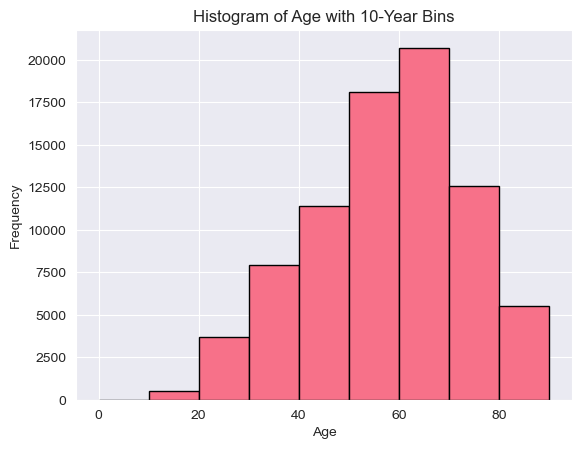

In [922]:
# Ensure max age is an integer
max_age = int(df["Age"].max()) 

# Define bin edges for every 10 years
bins = range(0, max_age + 10, 10)

# Plot histogram with 10-year bins
df["Age"].hist(bins=bins, edgecolor="black")

# Labels and title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age with 10-Year Bins")

# Show plot
plt.show()


In [923]:
# Specific handling for Age column
print("\nAge Distribution before processing:")
print(df['Age'].describe())

# Use median imputation for Age
df['Age'] = df['Age'].fillna(df['Age'].median())

print("\nAge Distribution after processing:")
print(df['Age'].describe())


Age Distribution before processing:
count    80461.000000
mean        57.353426
std         15.762713
min         18.000000
25%         47.000000
50%         59.000000
75%         69.000000
max         90.000000
Name: Age, dtype: float64

Age Distribution after processing:
count    98999.000000
mean        57.661754
std         14.224959
min         18.000000
25%         50.000000
50%         59.000000
75%         66.000000
max         90.000000
Name: Age, dtype: float64


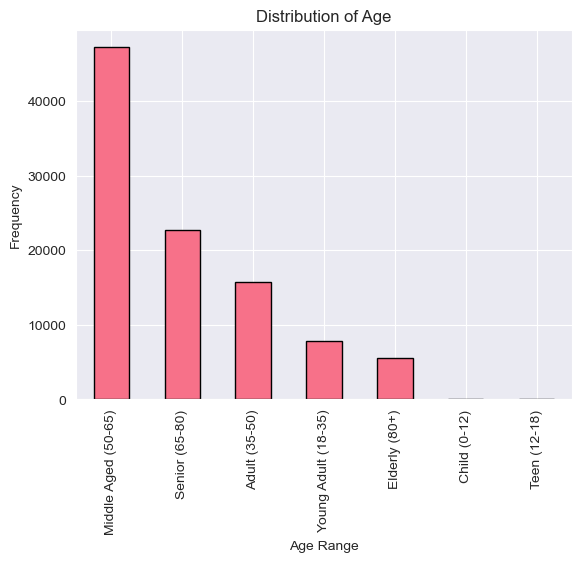

In [924]:
age_bins = [0, 12, 18, 35, 50, 65, 80, np.inf]
age_labels = ["Child (0-12)", "Teen (12-18)", "Young Adult (18-35)", "Adult (35-50)",
              "Middle Aged (50-65)", "Senior (65-80)", "Elderly (80+)"]

# Assign Age Group categories
df["Age Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)

# Count occurrences for each bin
age_counts = df["Age Group"].value_counts()

# Plot the bar chart
age_counts.plot(kind="bar", edgecolor="black")

# Add labels and title
plt.xlabel("Age Range")
plt.ylabel("Frequency")
plt.title("Distribution of Age")

# Show the plot
plt.show()

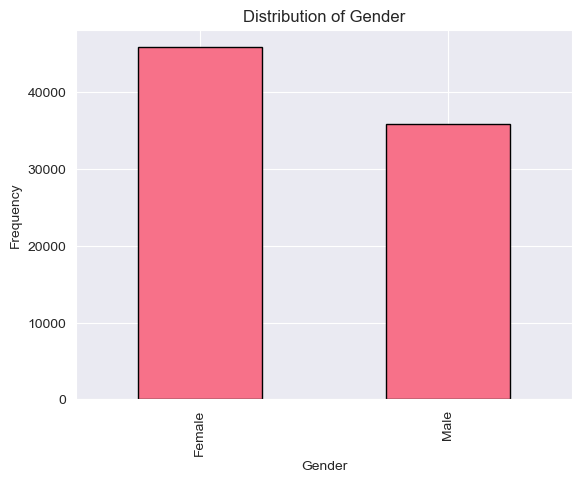

In [925]:
# Count the number of occurrences for each gender
gender_counts = df["Sex"].value_counts()

# Plot bar chart
gender_counts.plot(kind="bar", edgecolor="black")

# Labels and title
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Distribution of Gender")

# Show plot
plt.show()

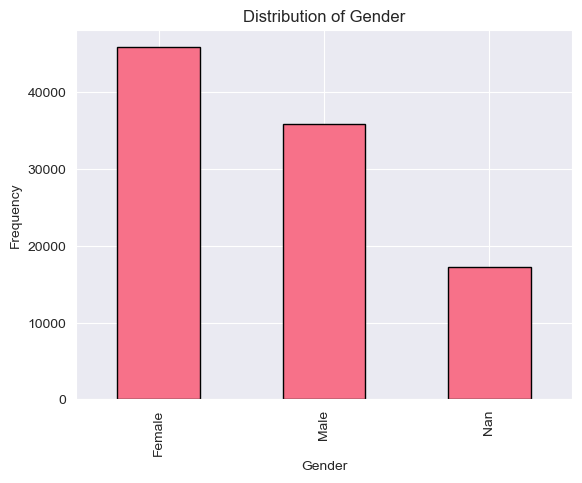

In [926]:
df['Sex'] = df['Sex'].replace(['Nan', 'nan', 'NAN'], 'Not Specified').astype(str).str.strip().str.title()

# Count the number of occurrences for each gender
gender_counts = df["Sex"].value_counts()

# Plot bar chart
gender_counts.plot(kind="bar", edgecolor="black")

# Labels and title
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Distribution of Gender")

# Show plot
plt.show()

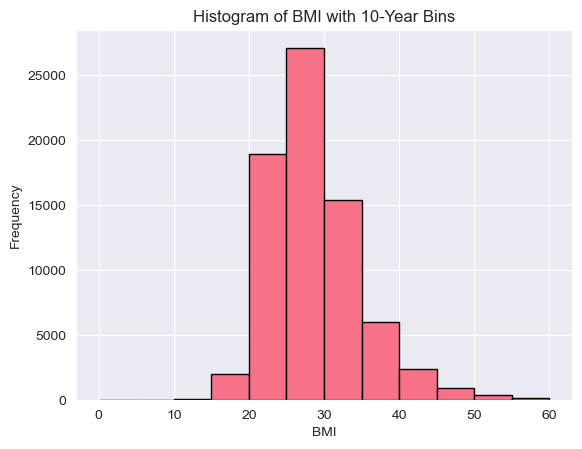

In [927]:
max_bmi = int(df["BMI"].max())

# Define bin edges for every 10
bins = range(0, max_bmi + 5, 5)

# Plot histogram with 10-year bins
df["BMI"].hist(bins=bins, edgecolor="black")

# Labels and title
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Histogram of BMI with 10-Year Bins")

# Show plot
plt.show()


In [928]:
# Specific handling for BMI missing values
print("\nBMI Distribution before processing:")
print(df['BMI'].describe())
print("\nNumber of rows before BMI processing:", len(df))

# Create age groups for BMI imputation with 10-year intervals
df['Age_Group'] = pd.cut(df['Age'],
                        bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                        labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

# Function to impute BMI based on gender and age group
def impute_bmi(row):
    if pd.isna(row['BMI']):
        # Get mean BMI for same gender and age group
        mask = (df['Sex'] == row['Sex']) & (df['Age_Group'] == row['Age_Group'])
        mean_bmi = df.loc[mask, 'BMI'].mean()
        return mean_bmi if not pd.isna(mean_bmi) else df['BMI'].median()
    return row['BMI']

# Apply the imputation
df['BMI'] = df.apply(impute_bmi, axis=1)

# Remove the temporary Age_Group column
df = df.drop('Age_Group', axis=1)

# Remove unrealistic BMI values
df = df[df['BMI'].between(10, 100)]  # Keep only realistic BMI values

print("\nBMI Distribution after processing:")
print(df['BMI'].describe())
print("\nNumber of rows after BMI processing:", len(df))
print("Number of rows removed:", len(df) - len(df))


BMI Distribution before processing:
count    73292.000000
mean        28.232249
std          6.044870
min         12.000000
25%         24.000000
50%         27.000000
75%         31.000000
max         60.000000
Name: BMI, dtype: float64

Number of rows before BMI processing: 98999

BMI Distribution after processing:
count    98999.000000
mean        28.227894
std          5.214639
min         12.000000
25%         25.000000
50%         28.000000
75%         30.000000
max         60.000000
Name: BMI, dtype: float64

Number of rows after BMI processing: 98999
Number of rows removed: 0


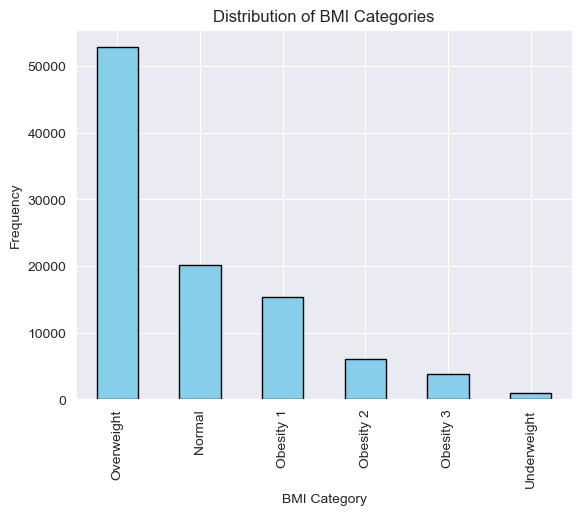

In [929]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

# Plot the count of each BMI category
bmi_counts = df['NewBMI'].value_counts()

# Create a bar chart
bmi_counts.plot(kind='bar', edgecolor='black', color='skyblue')

# Add labels and title
plt.xlabel('BMI Category')
plt.ylabel('Frequency')
plt.title('Distribution of BMI Categories')

# Show the plot
plt.show()

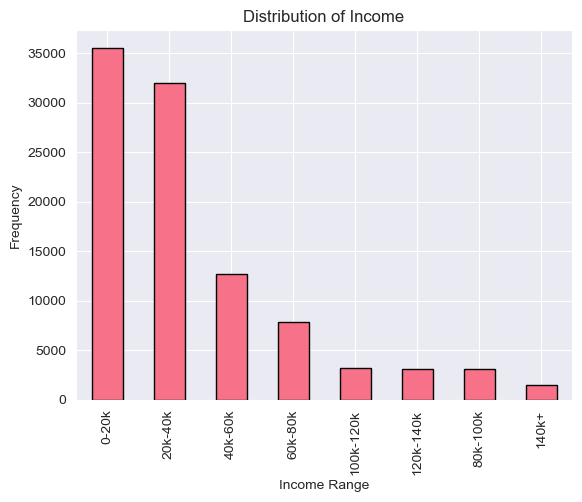

In [930]:
df['Income'] = df['Income'].replace({'\$': '', ',': ''}, regex=True).astype(float)

df['Income'].fillna(df['Income'].median(), inplace=True)  # Filling with the median

income_bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000]
income_labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', '140k+']

# Bin the 'Income' column
df['Income_binned'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)

#Count the number of occurrences for each bin
Income_counts = df['Income_binned'].value_counts()

#Plot the bar chart
Income_counts.plot(kind='bar', edgecolor='black')

plt.xlabel('Income Range')
plt.ylabel('Frequency')
plt.title('Distribution of Income')

plt.show()

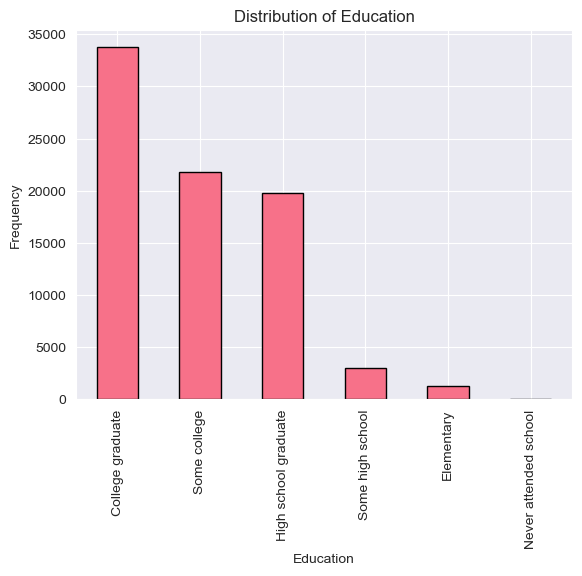

In [931]:
# Count the number of occurrences for each gender
Education_counts = df["Education"].value_counts()

# Plot bar chart
Education_counts.plot(kind="bar", edgecolor="black")

# Labels and title
plt.xlabel("Education")
plt.ylabel("Frequency")
plt.title("Distribution of Education")

# Show plot
plt.show()

In [932]:
# Print Education distribution before processing
print("\nEducation Distribution before processing:")
print(df['Education'].value_counts())

# Fill missing values with the mode
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])

# Print Education distribution after processing
print("\nEducation Distribution after processing:")
print(df['Education'].value_counts())


Education Distribution before processing:
Education
College graduate         33740
Some college             21785
High school graduate     19746
Some high school          3017
Elementary                1288
Never attended school       65
Name: count, dtype: int64

Education Distribution after processing:
Education
College graduate         53098
Some college             21785
High school graduate     19746
Some high school          3017
Elementary                1288
Never attended school       65
Name: count, dtype: int64


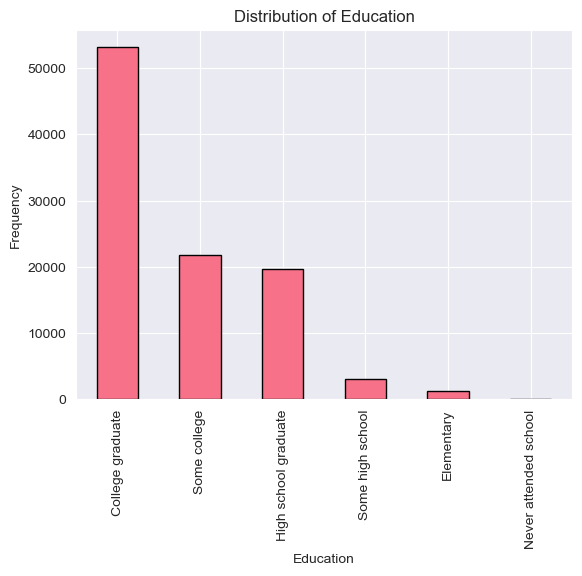

In [933]:
# Count the number of occurrences for each gender
Education_counts = df["Education"].value_counts()

# Plot bar chart
Education_counts.plot(kind="bar", edgecolor="black")

# Labels and title
plt.xlabel("Education")
plt.ylabel("Frequency")
plt.title("Distribution of Education")

# Show plot
plt.show()

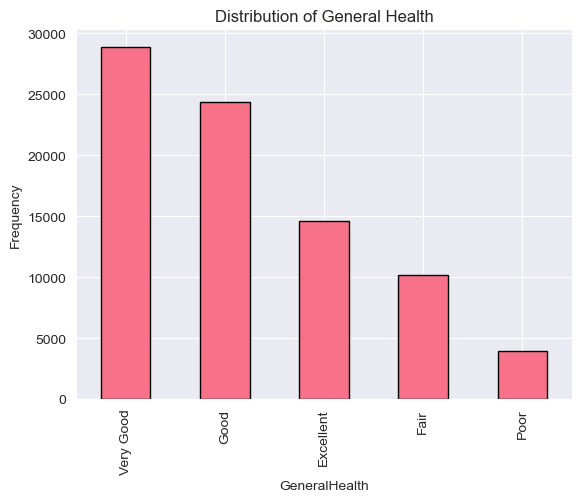

In [934]:
# Count the number of occurrences for each gender
health_counts = df["GeneralHealth"].value_counts()

# Plot bar chart
health_counts.plot(kind="bar", edgecolor="black")

# Labels and title
plt.xlabel("GeneralHealth")
plt.ylabel("Frequency")
plt.title("Distribution of General Health")

# Show plot
plt.show()

In [935]:
# Print Education distribution before processing
print("\nGeneral Health Distribution before processing:")
print(df['GeneralHealth'].value_counts())

# Fill missing values with the mode
df['GeneralHealth'] = df['GeneralHealth'].fillna(df['GeneralHealth'].mode()[0])

# Print Education distribution after processing
print("\nGeneral Health Distribution after processing:")
print(df['GeneralHealth'].value_counts())


General Health Distribution before processing:
GeneralHealth
Very Good    28887
Good         24375
Excellent    14599
Fair         10167
Poor          3922
Name: count, dtype: int64

General Health Distribution after processing:
GeneralHealth
Very Good    45936
Good         24375
Excellent    14599
Fair         10167
Poor          3922
Name: count, dtype: int64


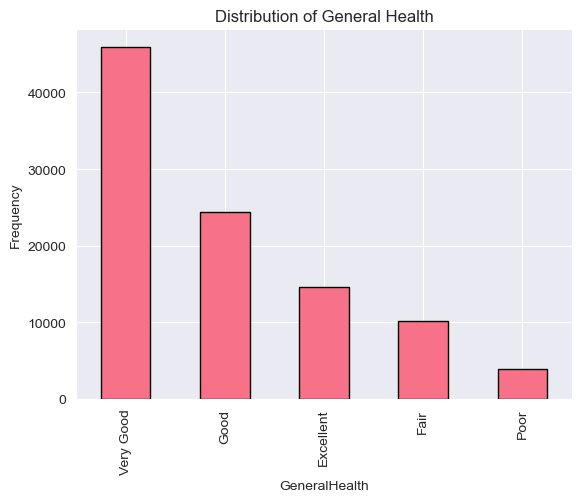

In [936]:
# Count the number of occurrences for each gender
health_counts = df["GeneralHealth"].value_counts()

# Plot bar chart
health_counts.plot(kind="bar", edgecolor="black")

# Labels and title
plt.xlabel("GeneralHealth")
plt.ylabel("Frequency")
plt.title("Distribution of General Health")

# Show plot
plt.show()

In [937]:
# Handle missing values for other categorical columns
categorical_columns = ['BloodPressure', 'Cholesterol', 'Alcoholic']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

df.head()

CholCheck        BMI  Smoker  Stroke  HeartDiseaseorAttack GeneralHealth  \
1        NaN  25.000000     NaN     0.0                   0.0          Good   
5        NaN  28.777471     1.0     NaN                   0.0     Very Good   
6        1.0  30.000000     NaN     NaN                   0.0          Good   
8        NaN  28.534144     NaN     NaN                   1.0          Poor   
9        NaN  24.000000     0.0     0.0                   0.0     Very Good   

   Mental (days)  Physical (days)  DiffWalk     Sex   Age  \
1            NaN              NaN       NaN  Female  54.0   
5            0.0              NaN       0.0    Male  66.0   
6            0.0              NaN       0.0  Female  62.0   
8           30.0             30.0       NaN     Nan  62.0   
9            0.0              0.0       0.0    Male  59.0   

              Education   Income BloodPressure Cholesterol Alcoholic  \
1      College graduate  22322.0            No          No        No   
5      College graduate  83852.0           Yes          No        No   
6      College graduate  25029.0            No          No        No   
8      College graduate  50825.0           Yes         Yes        No   
9  High school graduate  10279.0            No          No        No   

   Diabetes            Age Group      NewBMI Income_binned  
1        No  Middle Aged (50-65)  Overweight       20k-40k  
5        No       Senior (65-80)  Overweight      80k-100k  
6        No  Middle Aged (50-65)   Obesity 1       20k-40k  
8  Diabetes  Middle Aged (50-65)  Overweight       40k-60k  
9        No  Middle Aged (50-65)      Normal         0-20k

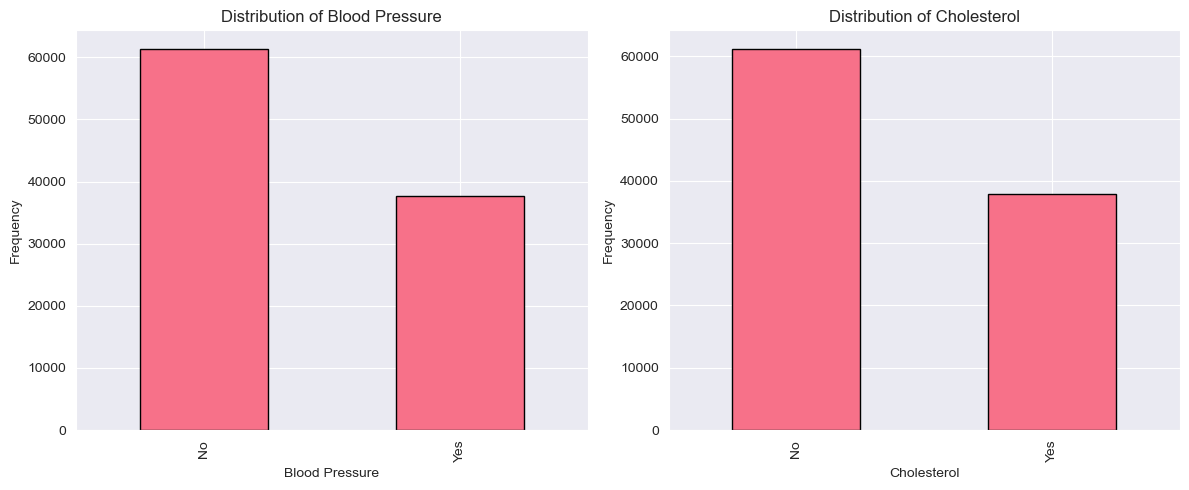

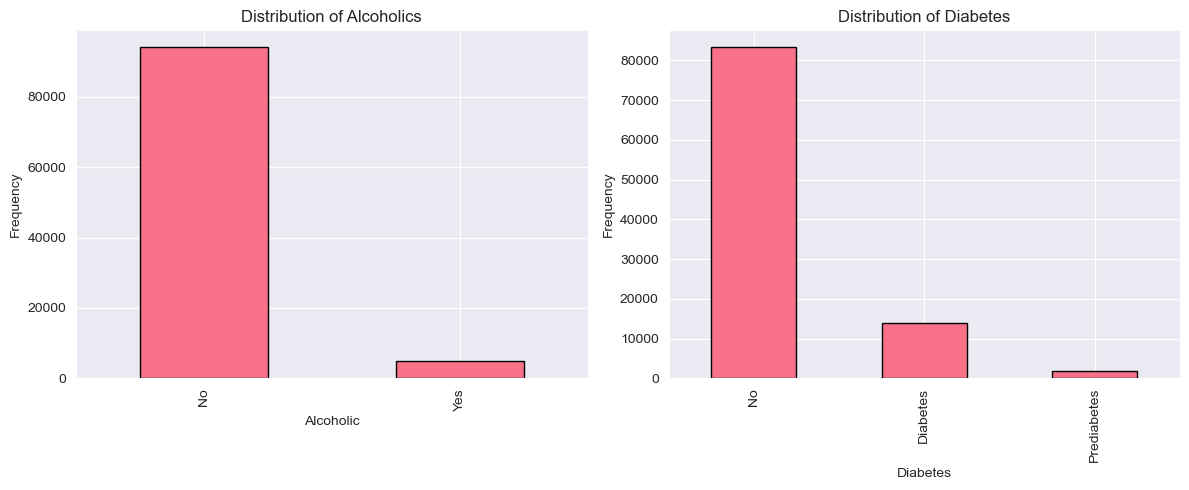

In [938]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df["BloodPressure"].value_counts().plot(kind="bar", edgecolor="black", ax=axes[0])
axes[0].set_xlabel("Blood Pressure")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Blood Pressure")

df["Cholesterol"].value_counts().plot(kind="bar", edgecolor="black", ax=axes[1])
axes[1].set_xlabel("Cholesterol")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Cholesterol")

plt.tight_layout()  # Adjust layout
plt.show()  # Show first pair of plots

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df["Alcoholic"].value_counts().plot(kind="bar", edgecolor="black", ax=axes[0])
axes[0].set_xlabel("Alcoholic")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Alcoholics")

df["Diabetes"].value_counts().plot(kind="bar", edgecolor="black", ax=axes[1])
axes[1].set_xlabel("Diabetes")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Diabetes")

plt.tight_layout()  # Adjust layout
plt.show()  # Show second pair of plots


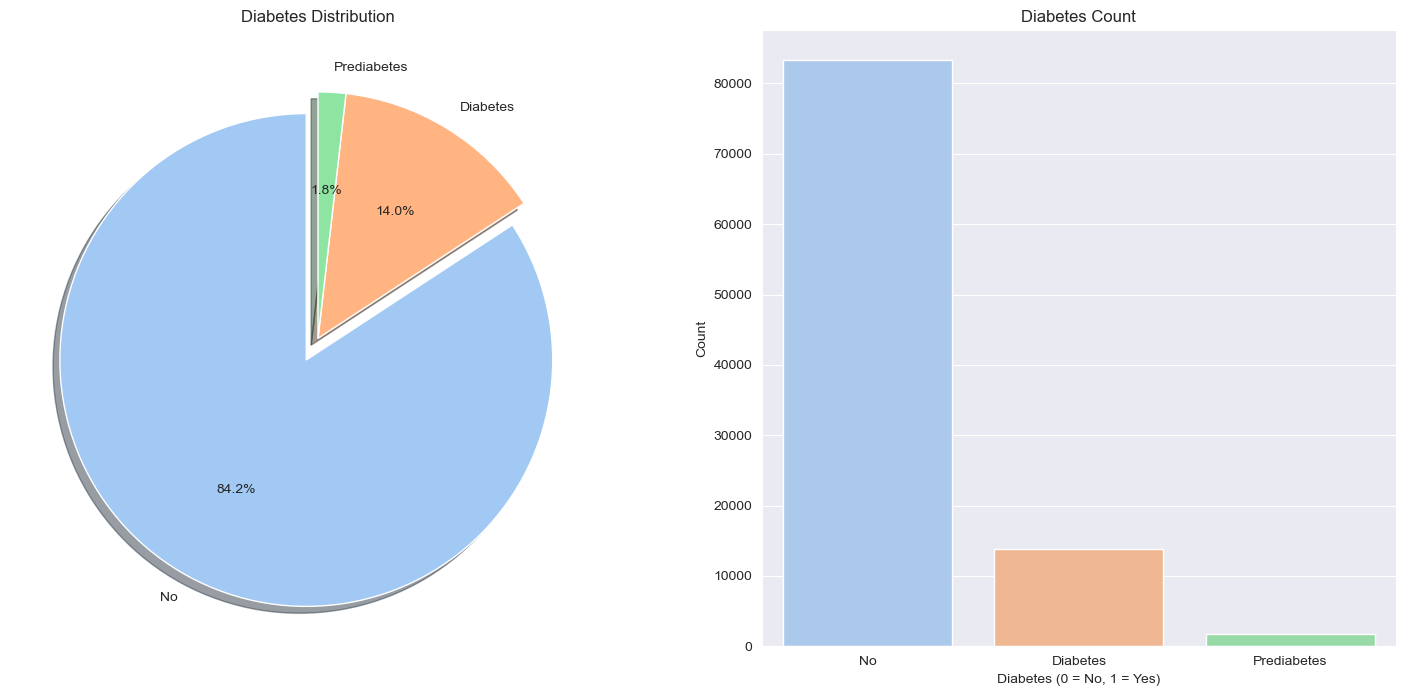

In [939]:
# Count occurrences of each unique value in 'Diabetes'
diabetes_counts = df['Diabetes'].value_counts()

explode_values = [0.1 if i == 0 else 0 for i in range(len(diabetes_counts))]

# Create figure and axes
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart for diabetes distribution
diabetes_counts.plot.pie(
    explode=explode_values,  # Dynamically adjust based on categories
    autopct='%1.1f%%',  # Show percentage values
    ax=ax[0],
    shadow=True,
    colors=sns.color_palette("pastel", len(diabetes_counts)),  # Generate enough colors
    startangle=90  # Rotate for better alignment
)
ax[0].set_title('Diabetes Distribution')
ax[0].set_ylabel('')  # Remove y-label for a cleaner look

# Count plot (bar chart)
sns.countplot(x='Diabetes', data=df, ax=ax[1], palette="pastel")
ax[1].set_title('Diabetes Count')
ax[1].set_xlabel('Diabetes (0 = No, 1 = Yes)')
ax[1].set_ylabel('Count')

# Display the plots
plt.show()

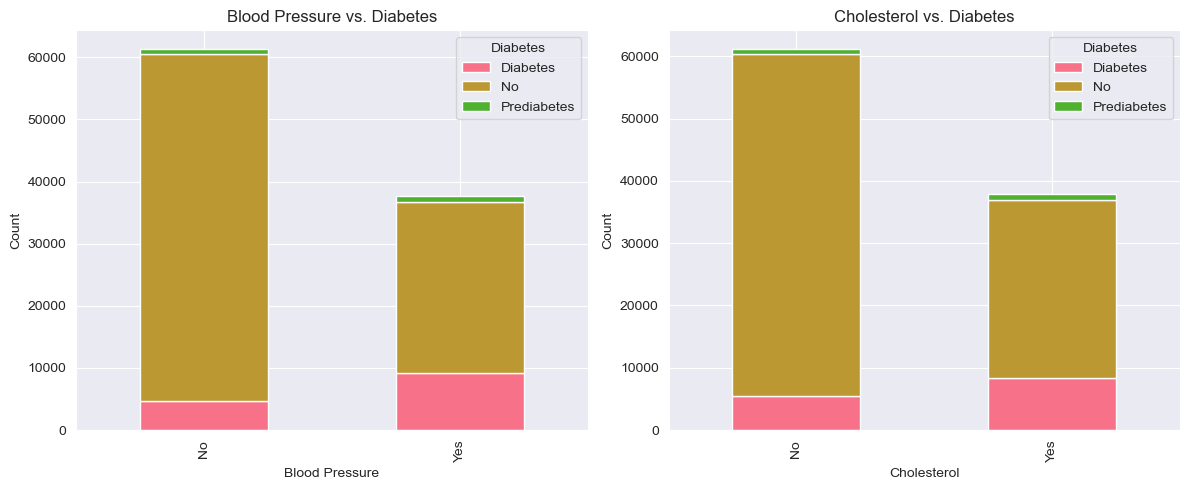

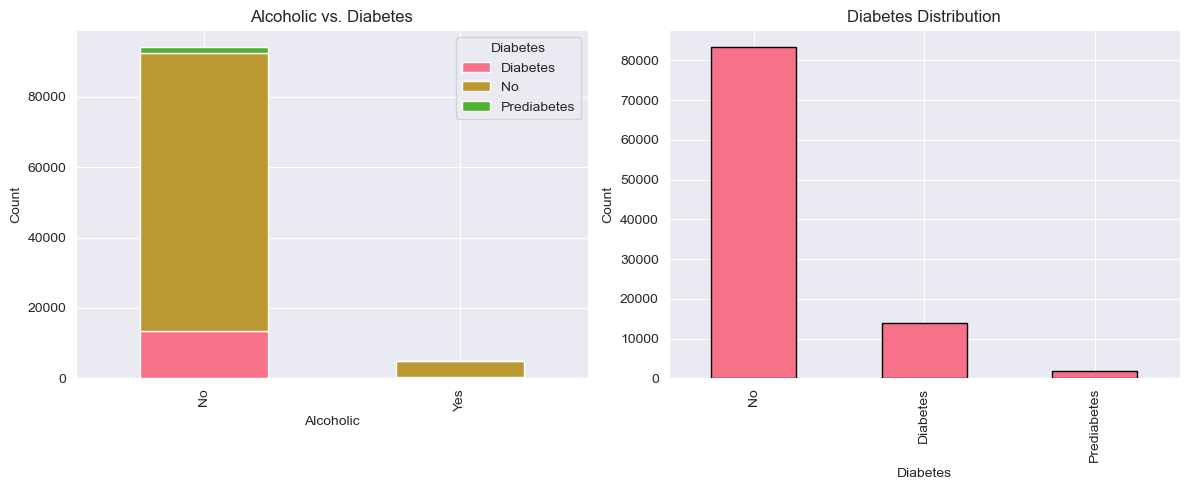

In [940]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df.groupby("BloodPressure")['Diabetes'].value_counts().unstack().plot(kind="bar", stacked=True, ax=axes[0])
axes[0].set_xlabel("Blood Pressure")
axes[0].set_ylabel("Count")
axes[0].set_title("Blood Pressure vs. Diabetes")
axes[0].legend(title="Diabetes")

df.groupby("Cholesterol")['Diabetes'].value_counts().unstack().plot(kind="bar", stacked=True, ax=axes[1])
axes[1].set_xlabel("Cholesterol")
axes[1].set_ylabel("Count")
axes[1].set_title("Cholesterol vs. Diabetes")
axes[1].legend(title="Diabetes")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df.groupby("Alcoholic")['Diabetes'].value_counts().unstack().plot(kind="bar", stacked=True, ax=axes[0])
axes[0].set_xlabel("Alcoholic")
axes[0].set_ylabel("Count")
axes[0].set_title("Alcoholic vs. Diabetes")
axes[0].legend(title="Diabetes")

df['Diabetes'].value_counts().plot(kind="bar", edgecolor="black", ax=axes[1])
axes[1].set_xlabel("Diabetes")
axes[1].set_ylabel("Count")
axes[1].set_title("Diabetes Distribution")

plt.tight_layout()
plt.show()

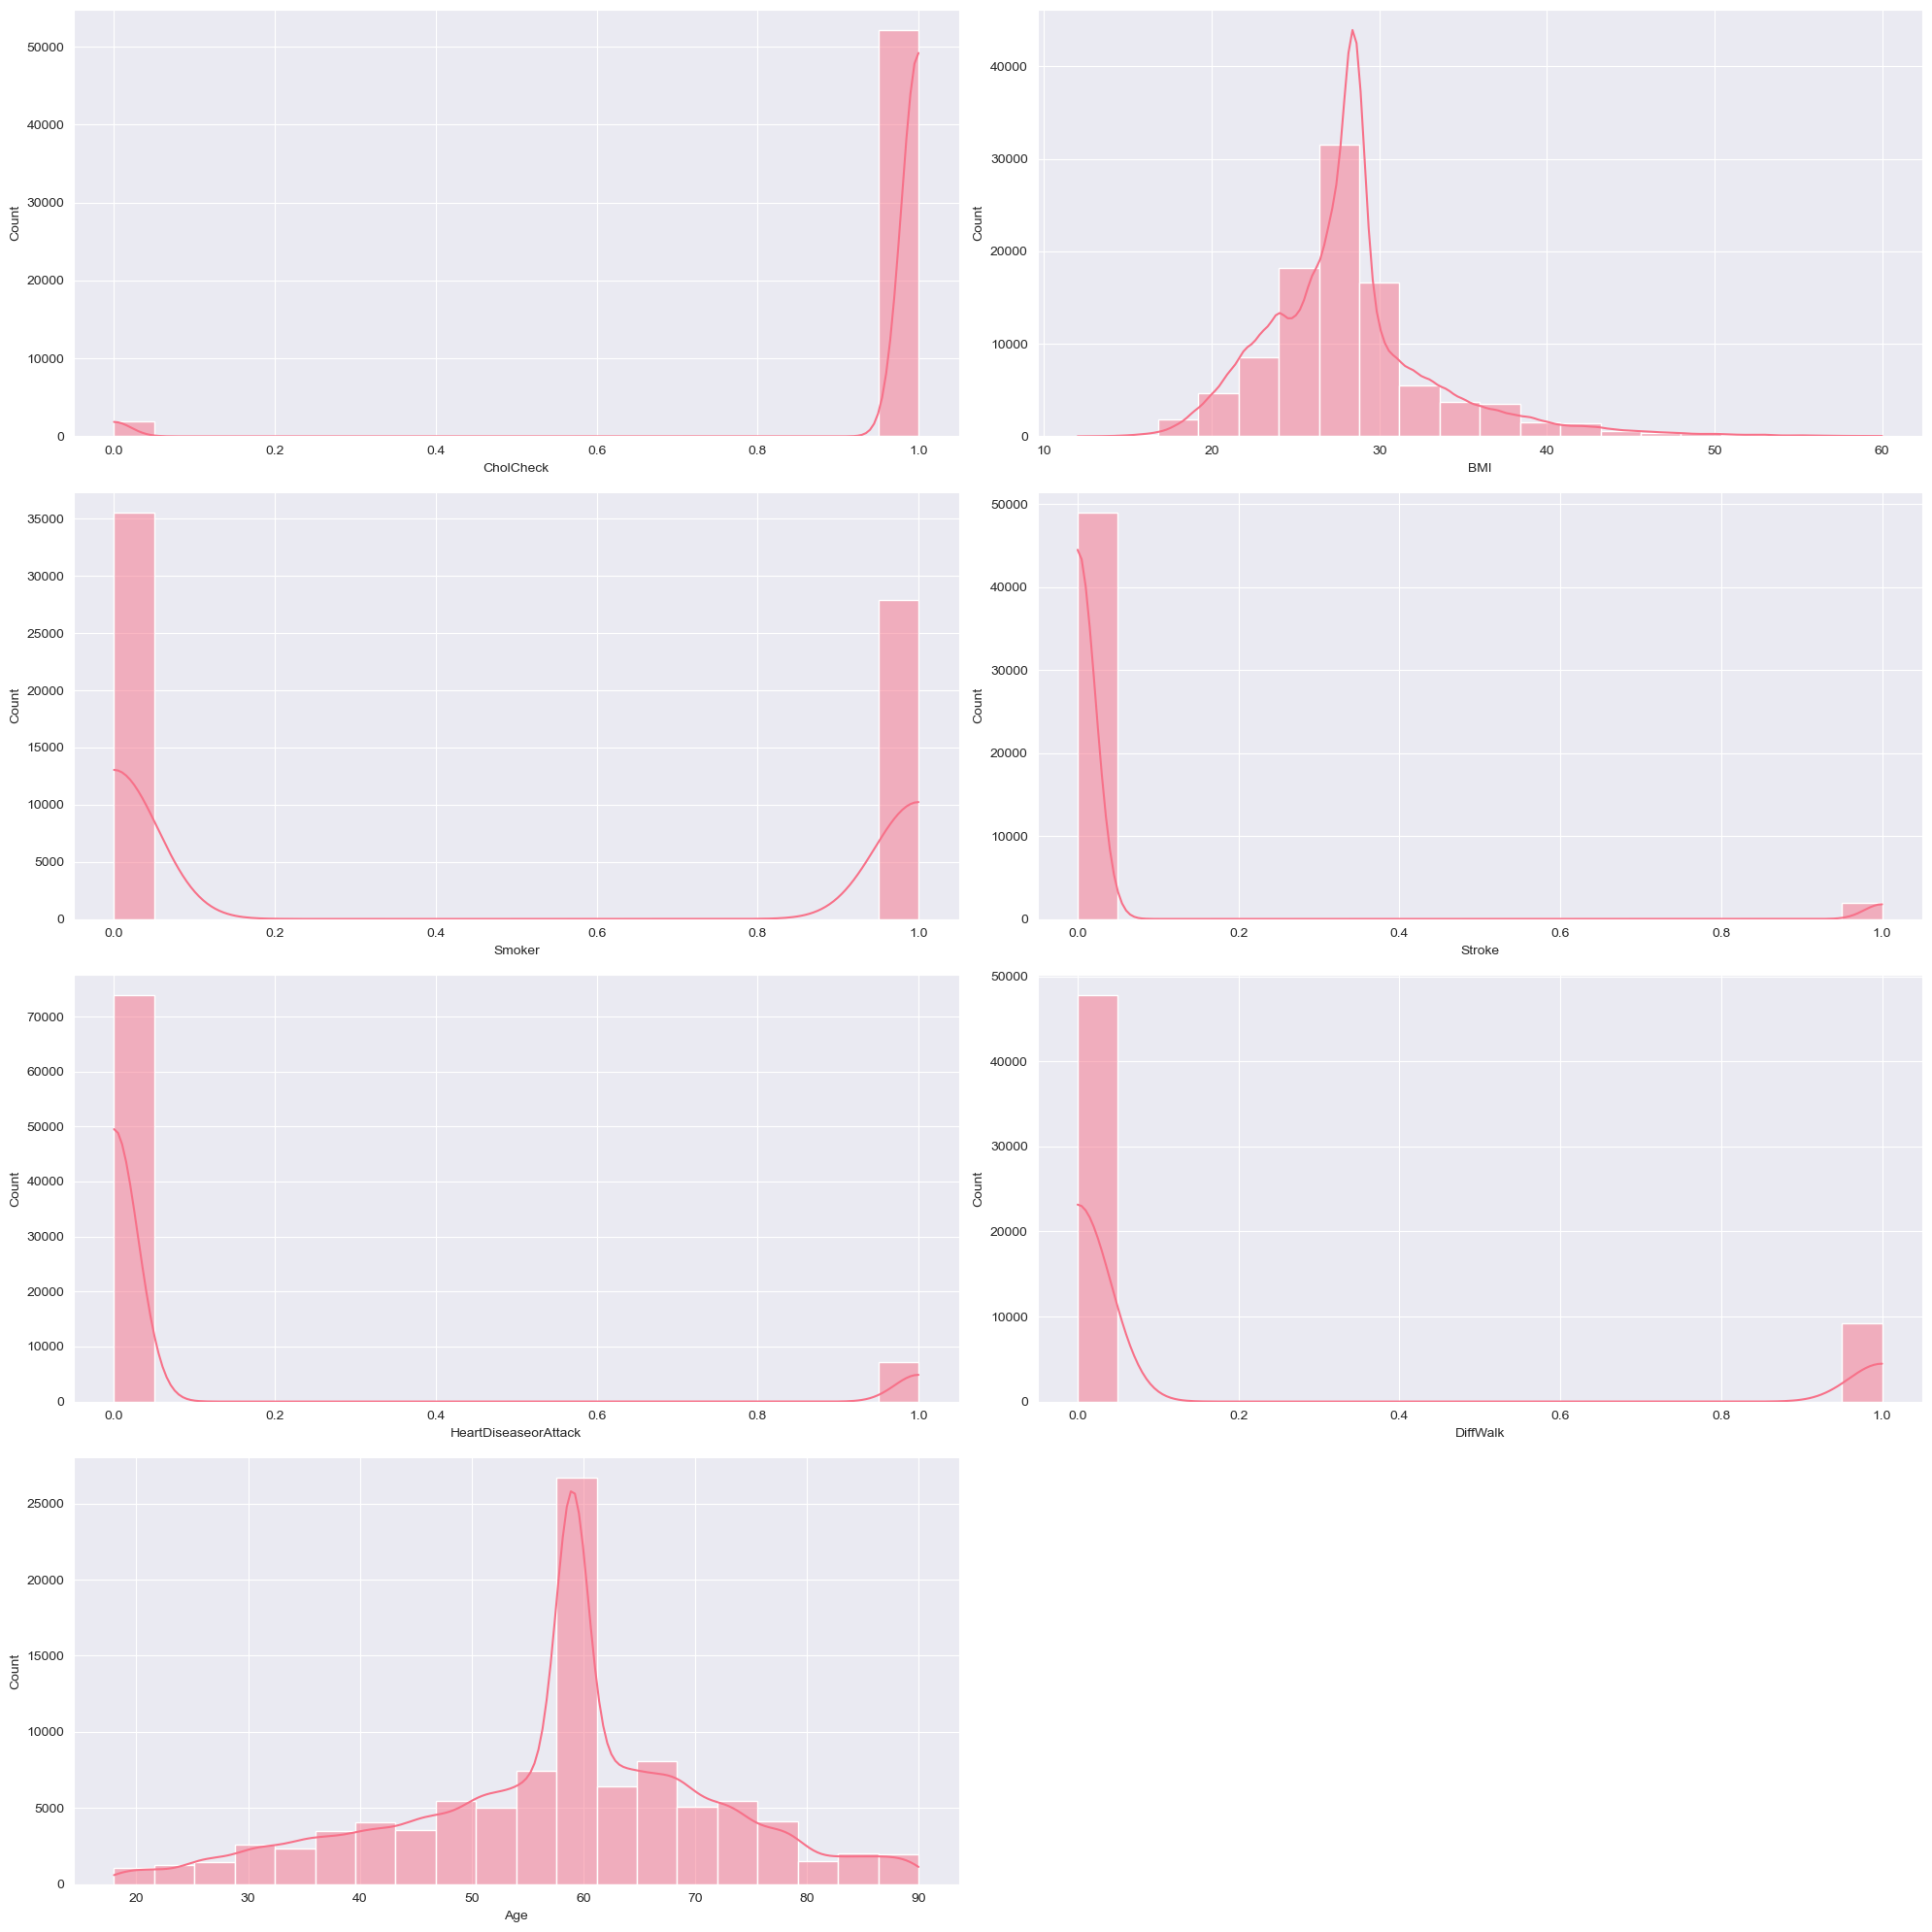

In [941]:
# Create the subplots
fig, ax = plt.subplots(4, 2, figsize=(20, 20))

# List of variables to plot
variables = ['CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk', 'Age']

# Plotting the distributions
sns.histplot(df.CholCheck, bins=20, kde=True, ax=ax[0, 0])
sns.histplot(df.BMI, bins=20, kde=True, ax=ax[0, 1])
sns.histplot(df.Smoker, bins=20, kde=True, ax=ax[1, 0])
sns.histplot(df.Stroke, bins=20, kde=True, ax=ax[1, 1])
sns.histplot(df.HeartDiseaseorAttack, bins=20, kde=True, ax=ax[2, 0])
sns.histplot(df.DiffWalk, bins=20, kde=True, ax=ax[2, 1])
sns.histplot(df.Age, bins=20, kde=True, ax=ax[3, 0])

# Determine the total number of subplots (axes)
total_plots = len(variables)

axes = ax.flatten()
for i in range(total_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [942]:
df.isnull().sum()

CholCheck               44908
BMI                         0
Smoker                  35585
Stroke                  48066
HeartDiseaseorAttack    17876
GeneralHealth               0
Mental (days)           38053
Physical (days)         44119
DiffWalk                42034
Sex                         0
Age                         0
Education                   0
Income                      0
BloodPressure               0
Cholesterol                 0
Alcoholic                   0
Diabetes                    0
Age Group                   0
NewBMI                      0
Income_binned               0
dtype: int64

In [943]:
df.head(11)

CholCheck        BMI  Smoker  Stroke  HeartDiseaseorAttack GeneralHealth  \
1         NaN  25.000000     NaN     0.0                   0.0          Good   
5         NaN  28.777471     1.0     NaN                   0.0     Very Good   
6         1.0  30.000000     NaN     NaN                   0.0          Good   
8         NaN  28.534144     NaN     NaN                   1.0          Poor   
9         NaN  24.000000     0.0     0.0                   0.0     Very Good   
11        1.0  28.453068     NaN     NaN                   0.0          Good   
12        1.0  26.000000     1.0     0.0                   NaN          Good   
15        NaN  33.000000     NaN     NaN                   0.0     Very Good   
19        NaN  28.000000     0.0     0.0                   0.0     Very Good   
20        1.0  22.000000     0.0     NaN                   1.0          Good   
22        NaN  29.309282     NaN     0.0                   0.0          Good   

    Mental (days)  Physical (days)  DiffWalk     Sex   Age  \
1             NaN              NaN       NaN  Female  54.0   
5             0.0              NaN       0.0    Male  66.0   
6             0.0              NaN       0.0  Female  62.0   
8            30.0             30.0       NaN     Nan  62.0   
9             0.0              0.0       0.0    Male  59.0   
11            0.0             30.0       NaN  Female  67.0   
12            0.0             15.0       NaN  Female  59.0   
15            NaN              0.0       0.0  Female  46.0   
19           10.0              NaN       0.0    Male  38.0   
20           30.0              0.0       1.0  Female  76.0   
22            0.0              7.0       NaN    Male  44.0   

               Education   Income BloodPressure Cholesterol Alcoholic  \
1       College graduate  22322.0            No          No        No   
5       College graduate  83852.0           Yes          No        No   
6       College graduate  25029.0            No          No        No   
8       College graduate  50825.0           Yes         Yes        No   
9   High school graduate  10279.0            No          No        No   
11          Some college  65890.0           Yes         Yes        No   
12      College graduate  19067.0            No          No        No   
15      College graduate  30816.0           Yes          No        No   
19      College graduate  17035.0            No         Yes       Yes   
20      College graduate  49853.0           Yes         Yes        No   
22          Some college  13286.0            No          No        No   

    Diabetes            Age Group      NewBMI Income_binned  
1         No  Middle Aged (50-65)  Overweight       20k-40k  
5         No       Senior (65-80)  Overweight      80k-100k  
6         No  Middle Aged (50-65)   Obesity 1       20k-40k  
8   Diabetes  Middle Aged (50-65)  Overweight       40k-60k  
9         No  Middle Aged (50-65)      Normal         0-20k  
11        No       Senior (65-80)  Overweight       60k-80k  
12        No  Middle Aged (50-65)  Overweight         0-20k  
15        No        Adult (35-50)   Obesity 1       20k-40k  
19        No        Adult (35-50)  Overweight         0-20k  
20        No       Senior (65-80)      Normal       40k-60k  
22        No        Adult (35-50)  Overweight         0-20k

In [944]:
print("\n=== Basic Data Information ===")
print("\nDataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Statistics:\n", df.describe())


=== Basic Data Information ===

Dataset Shape: (98999, 20)

Columns: ['CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'GeneralHealth', 'Mental (days)', 'Physical (days)', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'BloodPressure', 'Cholesterol', 'Alcoholic', 'Diabetes', 'Age Group', 'NewBMI', 'Income_binned']

Data Types:
 CholCheck                float64
BMI                      float64
Smoker                   float64
Stroke                   float64
HeartDiseaseorAttack     float64
GeneralHealth             object
Mental (days)            float64
Physical (days)          float64
DiffWalk                 float64
Sex                       object
Age                      float64
Education                 object
Income                   float64
BloodPressure             object
Cholesterol               object
Alcoholic                 object
Diabetes                  object
Age Group               category
NewBMI                  category
Income_binned           c

In [945]:
# Identify numerical columns excluding 'Age' and 'BMI'
numerical_columns = df.select_dtypes(include=[np.number]).columns
numerical_columns = [col for col in numerical_columns if col not in ['Age', 'BMI']]

# Apply median imputation for missing values in numerical columns
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Exclude 'Diabetes' and 'Education' from label encoding
categorical_columns = [col for col in categorical_columns if col not in ['Diabetes', 'Education', 'BMI', 'GeneralHealth']]

# Encode remaining categorical variables
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [946]:
# Now, we can look at where are missing values
df.isnull().sum()

CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
GeneralHealth           0
Mental (days)           0
Physical (days)         0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
BloodPressure           0
Cholesterol             0
Alcoholic               0
Diabetes                0
Age Group               0
NewBMI                  0
Income_binned           0
dtype: int64

In [947]:
df.head()

CholCheck        BMI  Smoker  Stroke  HeartDiseaseorAttack GeneralHealth  \
1        1.0  25.000000     0.0     0.0                   0.0          Good   
5        1.0  28.777471     1.0     0.0                   0.0     Very Good   
6        1.0  30.000000     0.0     0.0                   0.0          Good   
8        1.0  28.534144     0.0     0.0                   1.0          Poor   
9        1.0  24.000000     0.0     0.0                   0.0     Very Good   

   Mental (days)  Physical (days)  DiffWalk  Sex   Age             Education  \
1            0.0              0.0       0.0    0  54.0      College graduate   
5            0.0              0.0       0.0    1  66.0      College graduate   
6            0.0              0.0       0.0    0  62.0      College graduate   
8           30.0             30.0       0.0    2  62.0      College graduate   
9            0.0              0.0       0.0    1  59.0  High school graduate   

    Income  BloodPressure  Cholesterol  Alcoholic  Diabetes  \
1  22322.0              0            0          0        No   
5  83852.0              1            0          0        No   
6  25029.0              0            0          0        No   
8  50825.0              1            1          0  Diabetes   
9  10279.0              0            0          0        No   

             Age Group      NewBMI Income_binned  
1  Middle Aged (50-65)  Overweight       20k-40k  
5       Senior (65-80)  Overweight      80k-100k  
6  Middle Aged (50-65)   Obesity 1       20k-40k  
8  Middle Aged (50-65)  Overweight       40k-60k  
9  Middle Aged (50-65)      Normal         0-20k

In [948]:
print("\n=== Basic Data Information ===")
print("\nDataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Statistics:\n", df.describe())


=== Basic Data Information ===

Dataset Shape: (98999, 20)

Columns: ['CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'GeneralHealth', 'Mental (days)', 'Physical (days)', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'BloodPressure', 'Cholesterol', 'Alcoholic', 'Diabetes', 'Age Group', 'NewBMI', 'Income_binned']

Data Types:
 CholCheck                float64
BMI                      float64
Smoker                   float64
Stroke                   float64
HeartDiseaseorAttack     float64
GeneralHealth             object
Mental (days)            float64
Physical (days)          float64
DiffWalk                 float64
Sex                        int32
Age                      float64
Education                 object
Income                   float64
BloodPressure              int32
Cholesterol                int32
Alcoholic                  int32
Diabetes                  object
Age Group               category
NewBMI                  category
Income_binned           c

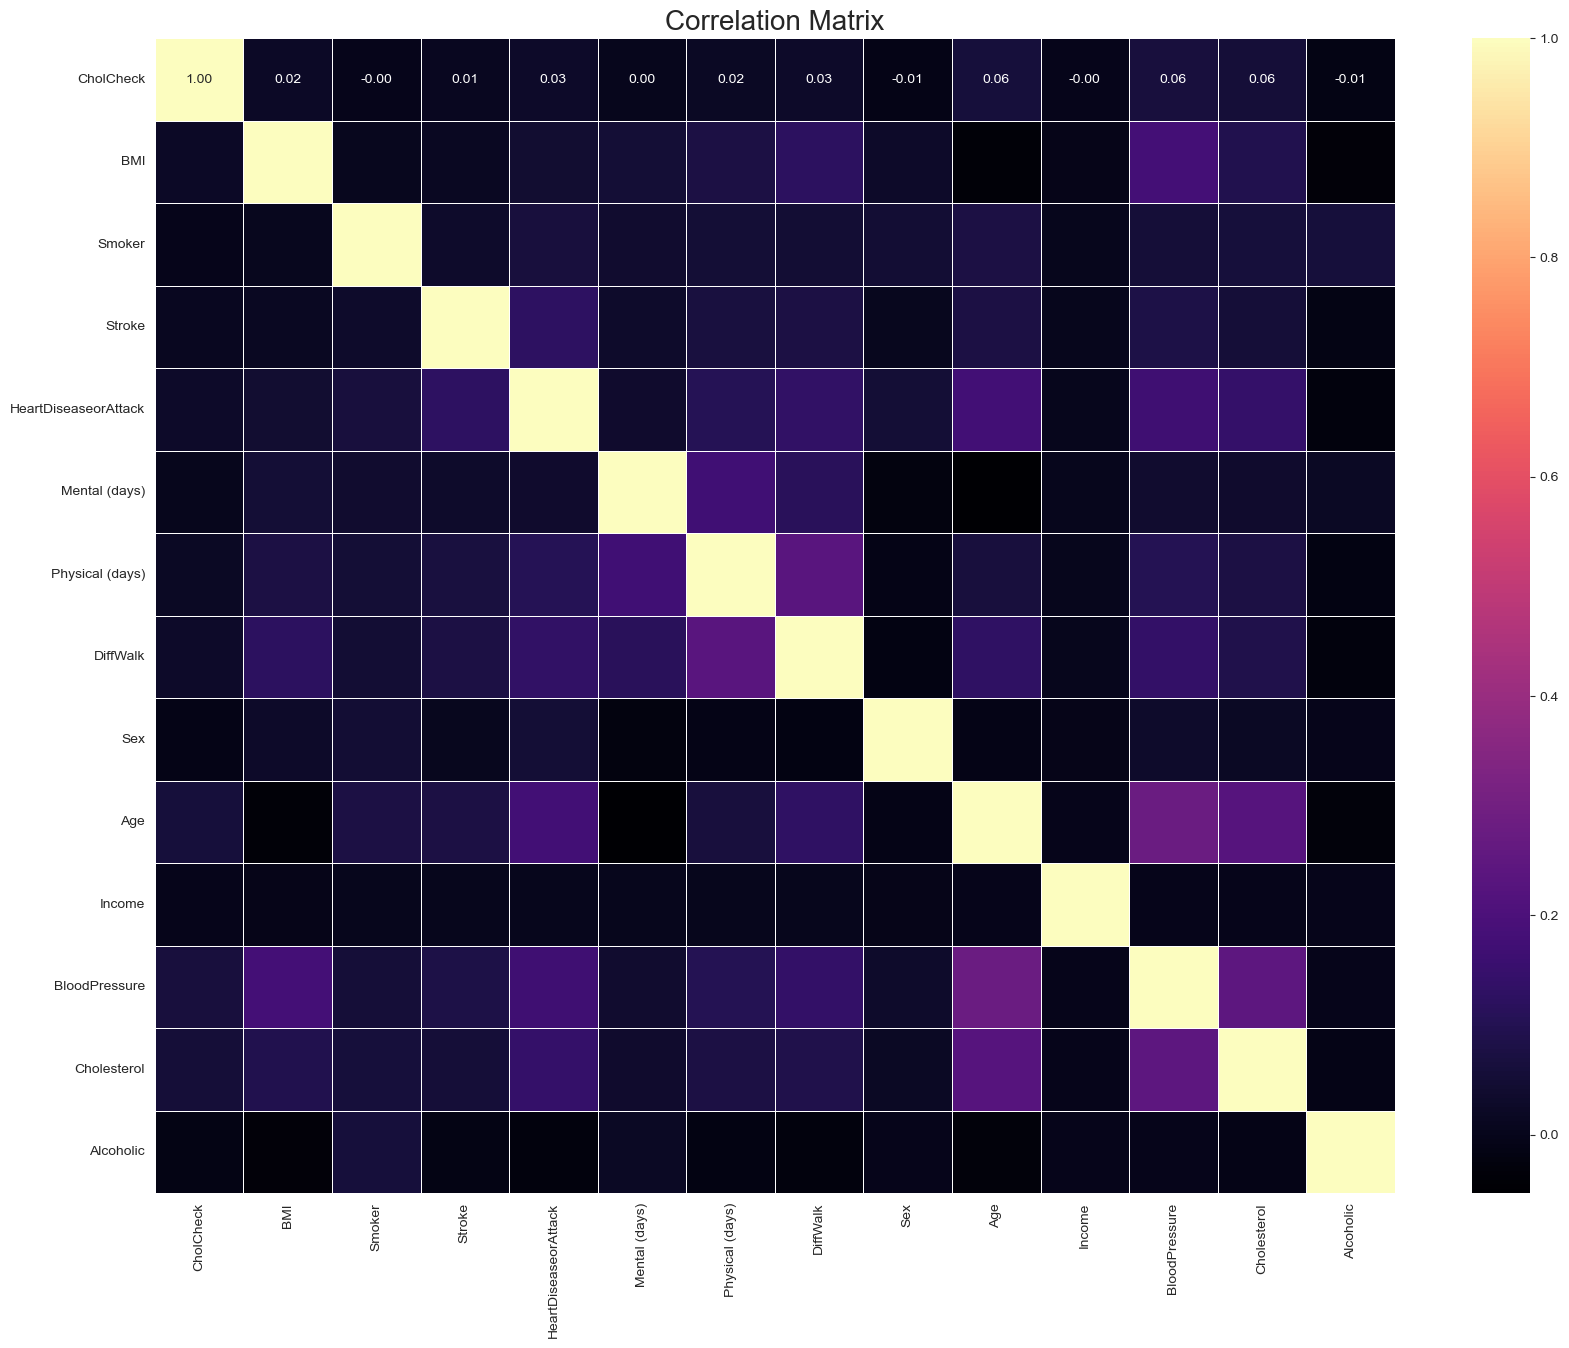

In [949]:
# Set figure size to make the heatmap larger
plt.figure(figsize=(20, 15))

df_numeric = df.select_dtypes(include=[np.number])  # Keep only numeric columns
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="magma", linewidths=0.5)

# Set title
plt.title("Correlation Matrix", fontsize=20)

# Heatmap
plt.savefig("confusion_matrix.png")
plt.show()

In [950]:
df_numeric = df.select_dtypes(include=[np.number])

correlation_matrix = df_numeric.corr()

# Print the entire correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                      CholCheck       BMI    Smoker    Stroke  \
CholCheck              1.000000  0.022458 -0.002524  0.009717   
BMI                    0.022458  1.000000  0.005487  0.014181   
Smoker                -0.002524  0.005487  1.000000  0.029153   
Stroke                 0.009717  0.014181  0.029153  1.000000   
HeartDiseaseorAttack   0.026912  0.041534  0.063683  0.126173   
Mental (days)          0.001464  0.053620  0.038009  0.032896   
Physical (days)        0.018474  0.076930  0.050103  0.066665   
DiffWalk               0.025227  0.122921  0.046154  0.078263   
Sex                   -0.009771  0.028014  0.047711  0.007872   
Age                    0.059204 -0.038307  0.076413  0.077507   
Income                -0.001583 -0.006033  0.000600  0.001531   
BloodPressure          0.063978  0.179992  0.055986  0.078784   
Cholesterol            0.057564  0.094109  0.058684  0.054734   
Alcoholic             -0.014734 -0.035866  0.061250 -0.013637   

    

In [951]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Identify numerical columns only
numerical_features = df_numeric.select_dtypes(include=['number']).columns

for feature in numerical_features:
    Q1 = df_numeric[feature].quantile(0.25)
    Q3 = df_numeric[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Filter only valid numeric values to check for outliers
    outliers = df_numeric[(df_numeric[feature] > upper) | (df_numeric[feature] < lower)]

    if not outliers.empty:
        print(feature, "yes")  # Outliers exist
    else:
        print(feature, "no")   # No outliers


CholCheck yes
BMI yes
Smoker no
Stroke yes
HeartDiseaseorAttack yes
GeneralHealth no
Mental (days) yes
Physical (days) yes
DiffWalk yes
Sex no
Age yes
Education no
Income yes
BloodPressure no
Cholesterol no
Alcoholic yes
Diabetes no
Age Group no
NewBMI no
Income_binned no


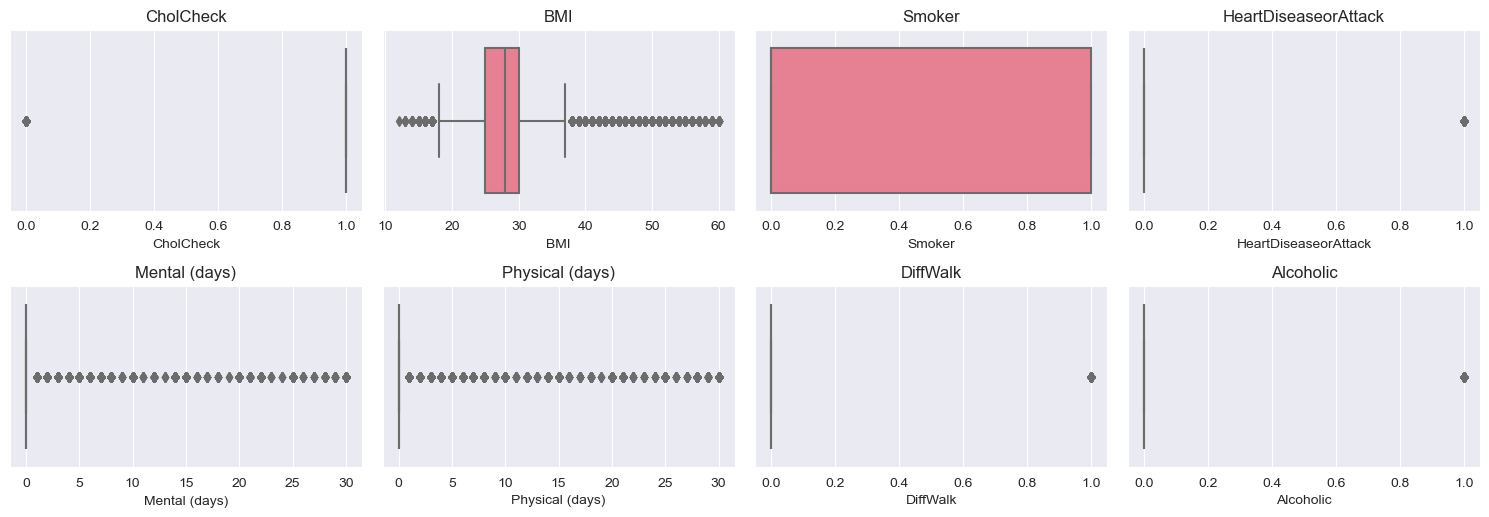

In [952]:
import matplotlib.pyplot as plt

# List of features to plot
outlier_features = [
    "CholCheck", "BMI", "Smoker", "HeartDiseaseorAttack",
    "Mental (days)", "Physical (days)", "DiffWalk", "Alcoholic"
]

# Create subplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(outlier_features, 1):
    plt.subplot(4, 4, i)  # Creating a grid of subplots (4 rows, 4 columns)
    sns.boxplot(x=df[feature])
    plt.title(feature)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [953]:
#Local Outlier Factors

In [954]:
df.isnull().sum()

CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
GeneralHealth           0
Mental (days)           0
Physical (days)         0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
BloodPressure           0
Cholesterol             0
Alcoholic               0
Diabetes                0
Age Group               0
NewBMI                  0
Income_binned           0
dtype: int64

In [955]:
df_numeric = df.select_dtypes(include=['number'])

from sklearn.neighbors import LocalOutlierFactor

# Apply LOF on numeric data
lof = LocalOutlierFactor(n_neighbors=10)
outliers = lof.fit_predict(df_numeric)

print(outliers)


[1 1 1 ... 1 1 1]


In [956]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-2.44751868e+10, -9.00000000e+09, -9.00000000e+09, -8.23279170e+09,
       -8.23279170e+09, -7.34840056e+09, -7.34840056e+09, -7.20369274e+09,
       -4.86406052e+09, -3.00000000e+09, -3.00000000e+09, -3.00000000e+09,
       -3.00000000e+09, -3.00000000e+09, -3.00000000e+09, -3.00000000e+09,
       -2.00000000e+09, -2.00000000e+09, -2.00000000e+09, -2.00000000e+09,
       -2.00000000e+09, -1.28457735e+09, -1.28457735e+09, -1.28457735e+09,
       -1.28457735e+09, -1.08451259e+09, -1.00000000e+09, -1.00000000e+09,
       -1.00000000e+09, -1.00000000e+09])

In [957]:
threshold = np.sort(df_scores)[7]
threshold

-7203692737.06237

In [958]:
outlier = df_scores > threshold
df = df[outlier]

In [959]:
df.shape

(98991, 20)

In [960]:
#One hot encoding

In [961]:
print(df.columns)

Index(['CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'GeneralHealth', 'Mental (days)', 'Physical (days)', 'DiffWalk', 'Sex',
       'Age', 'Education', 'Income', 'BloodPressure', 'Cholesterol',
       'Alcoholic', 'Diabetes', 'Age Group', 'NewBMI', 'Income_binned'],
      dtype='object')


In [962]:
df.head()

CholCheck        BMI  Smoker  Stroke  HeartDiseaseorAttack GeneralHealth  \
1        1.0  25.000000     0.0     0.0                   0.0          Good   
5        1.0  28.777471     1.0     0.0                   0.0     Very Good   
6        1.0  30.000000     0.0     0.0                   0.0          Good   
8        1.0  28.534144     0.0     0.0                   1.0          Poor   
9        1.0  24.000000     0.0     0.0                   0.0     Very Good   

   Mental (days)  Physical (days)  DiffWalk  Sex   Age             Education  \
1            0.0              0.0       0.0    0  54.0      College graduate   
5            0.0              0.0       0.0    1  66.0      College graduate   
6            0.0              0.0       0.0    0  62.0      College graduate   
8           30.0             30.0       0.0    2  62.0      College graduate   
9            0.0              0.0       0.0    1  59.0  High school graduate   

    Income  BloodPressure  Cholesterol  Alcoholic  Diabetes  \
1  22322.0              0            0          0        No   
5  83852.0              1            0          0        No   
6  25029.0              0            0          0        No   
8  50825.0              1            1          0  Diabetes   
9  10279.0              0            0          0        No   

             Age Group      NewBMI Income_binned  
1  Middle Aged (50-65)  Overweight       20k-40k  
5       Senior (65-80)  Overweight      80k-100k  
6  Middle Aged (50-65)   Obesity 1       20k-40k  
8  Middle Aged (50-65)  Overweight       40k-60k  
9  Middle Aged (50-65)      Normal         0-20k

In [963]:
agegroup_column = df["Age Group"]
nebmi_column = df["NewBMI"]
incomebinned_column = df["Income_binned"]
generalhealth_column = df["GeneralHealth"]

In [964]:
df["NewBMI"] = pd.Categorical(df["NewBMI"], categories=["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], ordered=True)
df["GeneralHealth"] = pd.Categorical(df["GeneralHealth"], categories=["Poor", "Fair", "Good", "Very Good", "Excellent"], ordered=True)                                                         
df_final = pd.get_dummies(df, columns =["NewBMI", "GeneralHealth", "Age Group"])

In [965]:
df_final.head()

CholCheck        BMI  Smoker  Stroke  HeartDiseaseorAttack  Mental (days)  \
1        1.0  25.000000     0.0     0.0                   0.0            0.0   
5        1.0  28.777471     1.0     0.0                   0.0            0.0   
6        1.0  30.000000     0.0     0.0                   0.0            0.0   
8        1.0  28.534144     0.0     0.0                   1.0           30.0   
9        1.0  24.000000     0.0     0.0                   0.0            0.0   

   Physical (days)  DiffWalk  Sex   Age  ... GeneralHealth_Good  \
1              0.0       0.0    0  54.0  ...               True   
5              0.0       0.0    1  66.0  ...              False   
6              0.0       0.0    0  62.0  ...               True   
8             30.0       0.0    2  62.0  ...              False   
9              0.0       0.0    1  59.0  ...              False   

   GeneralHealth_Very Good  GeneralHealth_Excellent  Age Group_Child (0-12)  \
1                    False                    False                   False   
5                     True                    False                   False   
6                    False                    False                   False   
8                    False                    False                   False   
9                     True                    False                   False   

   Age Group_Teen (12-18) Age Group_Young Adult (18-35)  \
1                   False                         False   
5                   False                         False   
6                   False                         False   
8                   False                         False   
9                   False                         False   

  Age Group_Adult (35-50)  Age Group_Middle Aged (50-65)  \
1                   False                           True   
5                   False                          False   
6                   False                           True   
8                   False                           True   
9                   False                           True   

   Age Group_Senior (65-80)  Age Group_Elderly (80+)  
1                     False                    False  
5                      True                    False  
6                     False                    False  
8                     False                    False  
9                     False                    False  

[5 rows x 35 columns]

Accuracy: 0.8347


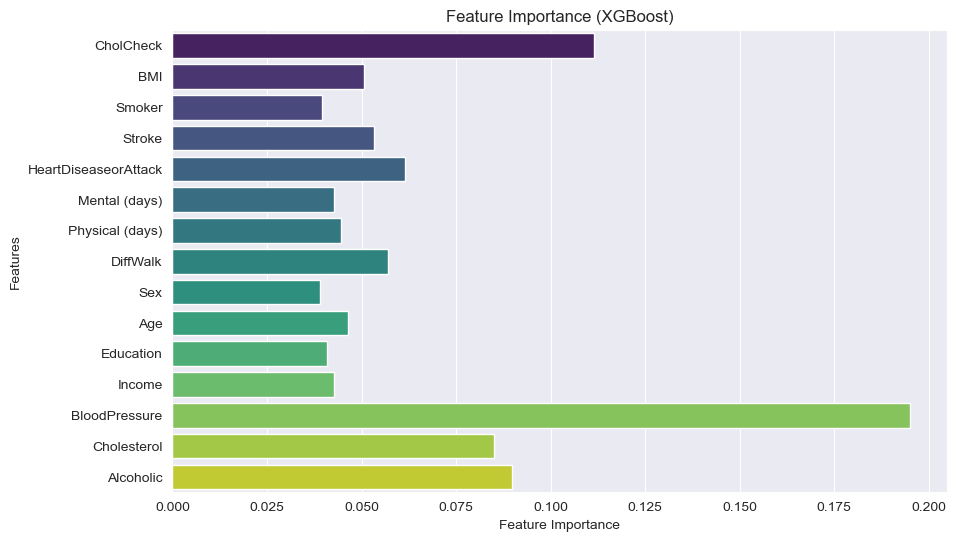

In [966]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df = df_final.drop('Income_binned', axis=1)

selected_columns = [
    "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack", "Mental (days)",
    "Physical (days)", "DiffWalk", "Sex", "Age", "Education", "Income", "BloodPressure",
    "Cholesterol", "Alcoholic"
]

# Target variable
y = df["Diabetes"]

df_encoded = df.copy()

# Convert categorical variables to numerical values using Label Encoding
categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))  # Convert strings to numbers
    label_encoders[col] = le

y = LabelEncoder().fit_transform(y)

# Use only selected features for training while keeping the rest in df_encoded
X_selected = df_encoded[selected_columns]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define and train the XGBoost model
model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.05, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

importances = model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X_selected.columns, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (XGBoost)")
plt.show()

In [967]:
cols = df.columns.tolist()
cols.remove('Diabetes')
cols.append('Diabetes')
df_final = df[cols]

df_final.tail(15)

CholCheck        BMI  Smoker  Stroke  HeartDiseaseorAttack  \
264770        1.0  27.000000     0.0     0.0                   0.0   
264773        1.0  42.000000     0.0     0.0                   0.0   
264775        1.0  39.000000     0.0     0.0                   0.0   
264776        1.0  22.000000     0.0     0.0                   0.0   
264778        1.0  26.356557     0.0     0.0                   0.0   
264780        1.0  29.000000     0.0     0.0                   0.0   
264781        1.0  28.822957     1.0     0.0                   0.0   
264782        1.0  25.000000     0.0     0.0                   0.0   
264783        1.0  31.000000     0.0     0.0                   0.0   
264787        1.0  22.000000     0.0     0.0                   0.0   
264789        1.0  29.000000     0.0     0.0                   0.0   
264795        1.0  22.000000     0.0     0.0                   0.0   
264796        1.0  22.000000     0.0     0.0                   0.0   
264798        1.0  27.000000     0.0     0.0                   0.0   
264800        1.0  23.000000     0.0     0.0                   0.0   

        Mental (days)  Physical (days)  DiffWalk  Sex   Age  ...  \
264770            0.0              0.0       0.0    2  59.0  ...   
264773            0.0              6.0       0.0    1  64.0  ...   
264775           30.0              0.0       0.0    2  59.0  ...   
264776            3.0              0.0       0.0    1  55.0  ...   
264778            0.0              0.0       0.0    1  86.0  ...   
264780            0.0             15.0       0.0    1  48.0  ...   
264781            0.0              0.0       0.0    1  59.0  ...   
264782            0.0              0.0       0.0    0  59.0  ...   
264783            0.0              0.0       0.0    2  52.0  ...   
264787            0.0              0.0       0.0    0  56.0  ...   
264789           10.0              4.0       1.0    2  53.0  ...   
264795            0.0              0.0       0.0    2  29.0  ...   
264796            0.0              0.0       0.0    1  28.0  ...   
264798            0.0              0.0       0.0    1  75.0  ...   
264800            0.0              0.0       0.0    0  59.0  ...   

       GeneralHealth_Very Good  GeneralHealth_Excellent  \
264770                    True                    False   
264773                   False                    False   
264775                   False                    False   
264776                   False                     True   
264778                    True                    False   
264780                   False                    False   
264781                   False                    False   
264782                   False                     True   
264783                    True                    False   
264787                    True                    False   
264789                    True                    False   
264795                   False                     True   
264796                   False                     True   
264798                   False                    False   
264800                    True                    False   

        Age Group_Child (0-12)  Age Group_Teen (12-18)  \
264770                   False                   False   
264773                   False                   False   
264775                   False                   False   
264776                   False                   False   
264778                   False                   False   
264780                   False                   False   
264781                   False                   False   
264782                   False                   False   
264783                   False                   False   
264787                   False                   False   
264789                   False                   False   
264795                   False                   False   
264796                   False                   False   
264798                   False           

In [968]:
columns_to_convert = [
    "NewBMI_Normal", "NewBMI_Obesity 1", "NewBMI_Obesity 2", "NewBMI_Obesity 3", "NewBMI_Overweight", 
    "NewBMI_Underweight", "Age Group_Child (0-12)", "Age Group_Teen (12-18)", "Age Group_Young Adult (18-35)", 
    "Age Group_Adult (35-50)", "Age Group_Middle Aged (50-65)", "Age Group_Senior (65-80)", "Age Group_Elderly (80+)"
]

df_final[columns_to_convert] = df_final[columns_to_convert].astype(int)

print(df_final[columns_to_convert].head())


   NewBMI_Normal  NewBMI_Obesity 1  NewBMI_Obesity 2  NewBMI_Obesity 3  \
1              0                 0                 0                 0   
5              0                 0                 0                 0   
6              0                 1                 0                 0   
8              0                 0                 0                 0   
9              1                 0                 0                 0   

   NewBMI_Overweight  NewBMI_Underweight  Age Group_Child (0-12)  \
1                  1                   0                       0   
5                  1                   0                       0   
6                  0                   0                       0   
8                  1                   0                       0   
9                  0                   0                       0   

   Age Group_Teen (12-18)  Age Group_Young Adult (18-35)  \
1                       0                              0   
5                       0 

In [969]:
df_final.head()

CholCheck        BMI  Smoker  Stroke  HeartDiseaseorAttack  Mental (days)  \
1        1.0  25.000000     0.0     0.0                   0.0            0.0   
5        1.0  28.777471     1.0     0.0                   0.0            0.0   
6        1.0  30.000000     0.0     0.0                   0.0            0.0   
8        1.0  28.534144     0.0     0.0                   1.0           30.0   
9        1.0  24.000000     0.0     0.0                   0.0            0.0   

   Physical (days)  DiffWalk  Sex   Age  ... GeneralHealth_Very Good  \
1              0.0       0.0    0  54.0  ...                   False   
5              0.0       0.0    1  66.0  ...                    True   
6              0.0       0.0    0  62.0  ...                   False   
8             30.0       0.0    2  62.0  ...                   False   
9              0.0       0.0    1  59.0  ...                    True   

   GeneralHealth_Excellent  Age Group_Child (0-12)  Age Group_Teen (12-18)  \
1                    False                       0                       0   
5                    False                       0                       0   
6                    False                       0                       0   
8                    False                       0                       0   
9                    False                       0                       0   

   Age Group_Young Adult (18-35)  Age Group_Adult (35-50)  \
1                              0                        0   
5                              0                        0   
6                              0                        0   
8                              0                        0   
9                              0                        0   

   Age Group_Middle Aged (50-65)  Age Group_Senior (65-80)  \
1                              1                         0   
5                              0                         1   
6                              1                         0   
8                              1                         0   
9                              1                         0   

   Age Group_Elderly (80+)  Diabetes  
1                        0        No  
5                        0        No  
6                        0        No  
8                        0  Diabetes  
9                        0        No  

[5 rows x 34 columns]

In [970]:
df_final.rename(columns={
    "CholCheck": "Cholesterol Check",
    "BMI": "Body Mass Index (BMI)",
    "Smoker": "Smoking Status",
    "HeartDiseaseorAttack": "History of Heart Disease or Attack",
    "Mental (days)": "Days with Mental Health Issues",
    "Physical (days)": "Days with Physical Health Issues",
    "DiffWalk": "Difficulty Walking",
    "Sex": "Gender",
    "Age": "Age",
    "Education": "Education Level",
    "GeneralHealth_0": "General Health (Poor)",
    "GeneralHealth_1": "General Health (Good)",
    "GeneralHealth_2": "General Health (Good)",
    "GeneralHealth_3": "General Health (Moderate)",
    "GeneralHealth_4": "General Health (Good)",
    "Age Group_Child (0-12)": "Age Group: Child (0-12)",
    "Age Group_Teen (12-18)": "Age Group: Teen (12-18)",
    "Age Group_Young Adult (18-35)": "Age Group: Young Adult (18-35)",
    "Age Group_Adult (35-50)": "Age Group: Adult (35-50)",
    "Age Group_Middle Aged (50-65)": "Age Group: Middle-Aged (50-65)",
    "Age Group_Senior (65-80)": "Age Group: Senior (65-80)",
    "Age Group_Elderly (80+)": "Age Group: Elderly (80+)",
    "Diabetes": "Diabetes Status"
}, inplace=True)

In [971]:
df_final["Body Mass Index (BMI)"] = df_final["Body Mass Index (BMI)"].apply(lambda x: round(x, 2) if not x.is_integer() else int(x))

In [972]:
df_final.head()

Cholesterol Check  Body Mass Index (BMI)  Smoking Status  Stroke  \
1                1.0                  25.00             0.0     0.0   
5                1.0                  28.78             1.0     0.0   
6                1.0                  30.00             0.0     0.0   
8                1.0                  28.53             0.0     0.0   
9                1.0                  24.00             0.0     0.0   

   History of Heart Disease or Attack  Days with Mental Health Issues  \
1                                 0.0                             0.0   
5                                 0.0                             0.0   
6                                 0.0                             0.0   
8                                 1.0                            30.0   
9                                 0.0                             0.0   

   Days with Physical Health Issues  Difficulty Walking  Gender   Age  ...  \
1                               0.0                 0.0       0  54.0  ...   
5                               0.0                 0.0       1  66.0  ...   
6                               0.0                 0.0       0  62.0  ...   
8                              30.0                 0.0       2  62.0  ...   
9                               0.0                 0.0       1  59.0  ...   

  GeneralHealth_Very Good  GeneralHealth_Excellent  Age Group: Child (0-12)  \
1                   False                    False                        0   
5                    True                    False                        0   
6                   False                    False                        0   
8                   False                    False                        0   
9                    True                    False                        0   

   Age Group: Teen (12-18)  Age Group: Young Adult (18-35)  \
1                        0                               0   
5                        0                               0   
6                        0                               0   
8                        0                               0   
9                        0                               0   

   Age Group: Adult (35-50)  Age Group: Middle-Aged (50-65)  \
1                         0                               1   
5                         0                               0   
6                         0                               1   
8                         0                               1   
9                         0                               1   

   Age Group: Senior (65-80)  Age Group: Elderly (80+)  Diabetes Status  
1                          0                         0               No  
5                          1                         0               No  
6                          0                         0               No  
8                          0                         0         Diabetes  
9                          0                         0               No  

[5 rows x 34 columns]

In [973]:
df_final["Gender"] = df_final["Gender"].map({0: "Female", 1: "Male", 2: "Not specified"})

In [974]:
columns_to_convert = [
    "GeneralHealth_Poor", "GeneralHealth_Fair", "GeneralHealth_Good", "GeneralHealth_Very Good", "GeneralHealth_Excellent"
]

df_final[columns_to_convert] = df_final[columns_to_convert].astype(int)

# Check the result
print(df_final[columns_to_convert].head())

   GeneralHealth_Poor  GeneralHealth_Fair  GeneralHealth_Good  \
1                   0                   0                   1   
5                   0                   0                   0   
6                   0                   0                   1   
8                   1                   0                   0   
9                   0                   0                   0   

   GeneralHealth_Very Good  GeneralHealth_Excellent  
1                        0                        0  
5                        1                        0  
6                        0                        0  
8                        0                        0  
9                        1                        0  


In [975]:
df_final.insert(10, "Age Group Classes", agegroup_column)
df_final.insert(2, "BMI Classes", nebmi_column)
df_final.insert(14, "Income Classes", incomebinned_column)
df_final.insert(12, "General Health Classes", generalhealth_column)

In [976]:
# Save the processed dataset
df_final.to_csv('cleaned_diabetes_data.csv', index=False)
print("\nCleaned dataset has been saved as 'cleaned_diabetes_data.csv'")


Cleaned dataset has been saved as 'cleaned_diabetes_data.csv'


In [977]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98991 entries, 1 to 264800
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Cholesterol Check                   98991 non-null  float64 
 1   Body Mass Index (BMI)               98991 non-null  float64 
 2   BMI Classes                         98991 non-null  category
 3   Smoking Status                      98991 non-null  float64 
 4   Stroke                              98991 non-null  float64 
 5   History of Heart Disease or Attack  98991 non-null  float64 
 6   Days with Mental Health Issues      98991 non-null  float64 
 7   Days with Physical Health Issues    98991 non-null  float64 
 8   Difficulty Walking                  98991 non-null  float64 
 9   Gender                              98991 non-null  object  
 10  Age                                 98991 non-null  float64 
 11  Age Group Classes               

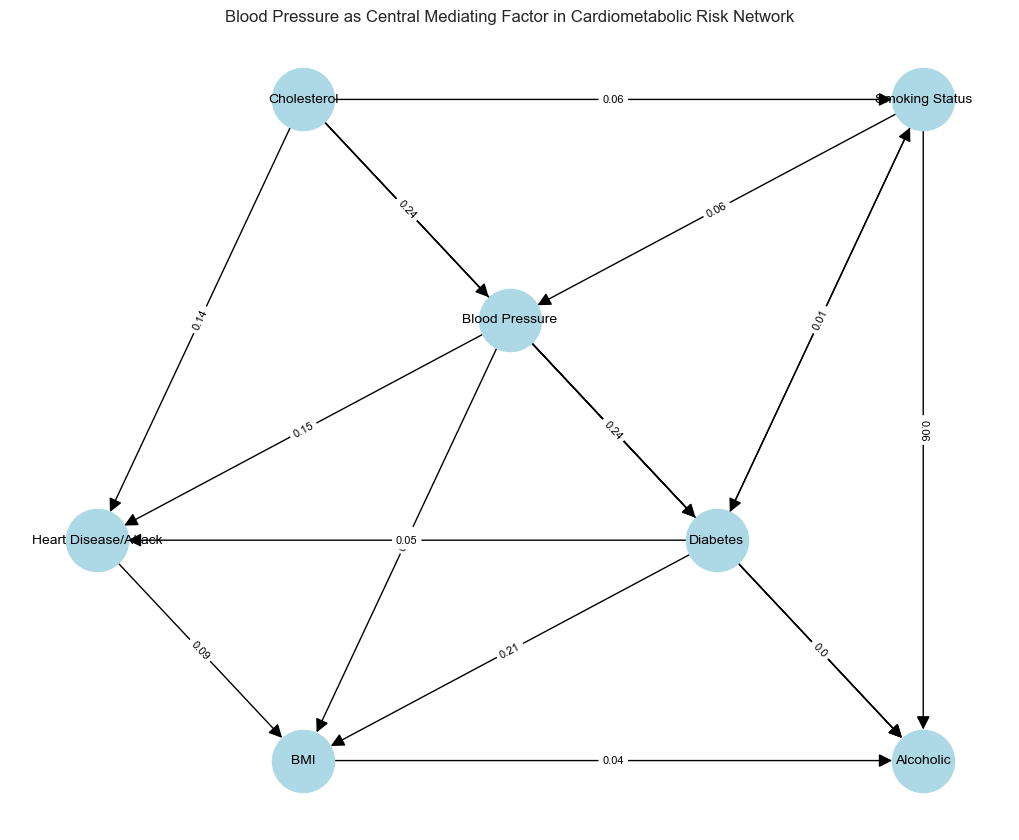

<Figure size 640x480 with 0 Axes>

In [978]:
import networkx as nx
import matplotlib.pyplot as plt

nodes = {
    "Cholesterol": (0, 3),
    "Smoking Status": (3, 3),
    "Blood Pressure": (1, 2),
    "Diabetes": (2, 1),
    "Heart Disease/Attack": (-1, 1),
    "BMI": (0, 0),
    "Alcoholic": (3, 0),
}

edges = [
    ("Cholesterol", "Smoking Status", 0.06),
    ("Cholesterol", "Blood Pressure", 0.24),
    ("Cholesterol", "Diabetes", 0.17),
    ("Cholesterol", "Heart Disease/Attack", 0.14),
    ("Cholesterol", "Alcoholic", 0.06),
    ("Smoking Status", "Blood Pressure", 0.06),
    ("Smoking Status", "Diabetes", 0.01),
    ("Smoking Status", "Alcoholic", 0.06),
    ("Blood Pressure", "Diabetes", 0.24),
    ("Blood Pressure", "Heart Disease/Attack", 0.15),
    ("Blood Pressure", "BMI", 0.18),
    ("Blood Pressure", "Alcoholic", 0.05),
    ("Diabetes", "BMI", 0.21),
    ("Diabetes", "Alcoholic", 0.04),
    ("Heart Disease/Attack", "BMI", 0.09),
    ("BMI", "Alcoholic", 0.04),
    ("Diabetes", "Smoking Status", 0.01),
    ("Diabetes", "Alcoholic", 0.00),
    ("Diabetes", "Heart Disease/Attack", 0.05),
]

G = nx.DiGraph()

for node, pos in nodes.items():
    G.add_node(node, pos=pos)

for u, v, weight in edges:
    G.add_edge(u, v, weight=weight)

pos = nx.get_node_attributes(G, 'pos')

edge_labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Blood Pressure as Central Mediating Factor in Cardiometabolic Risk Network")
plt.savefig("cardiometabolic_network.png")
plt.show()
plt.savefig(f'countplot_{feature}.png')

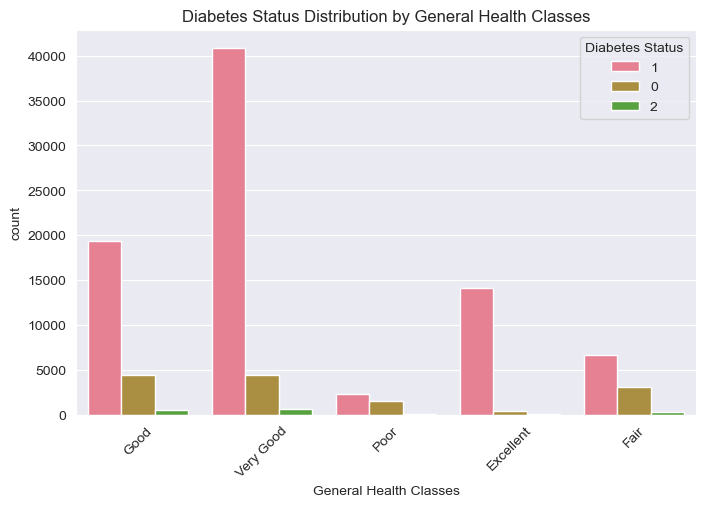

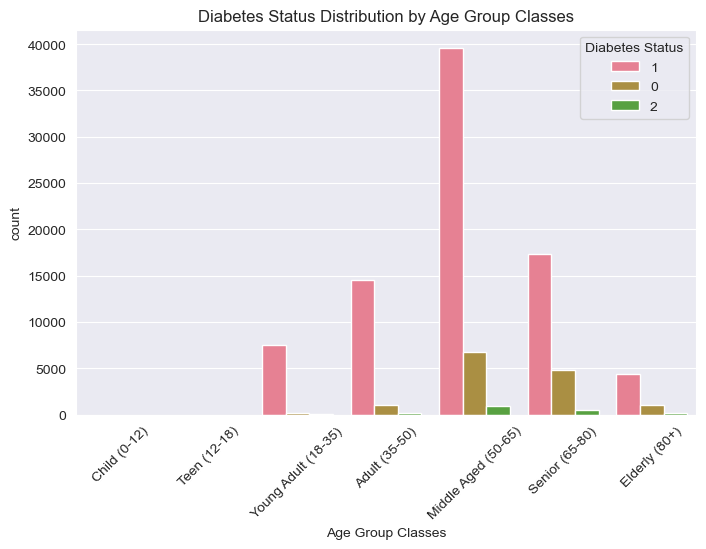

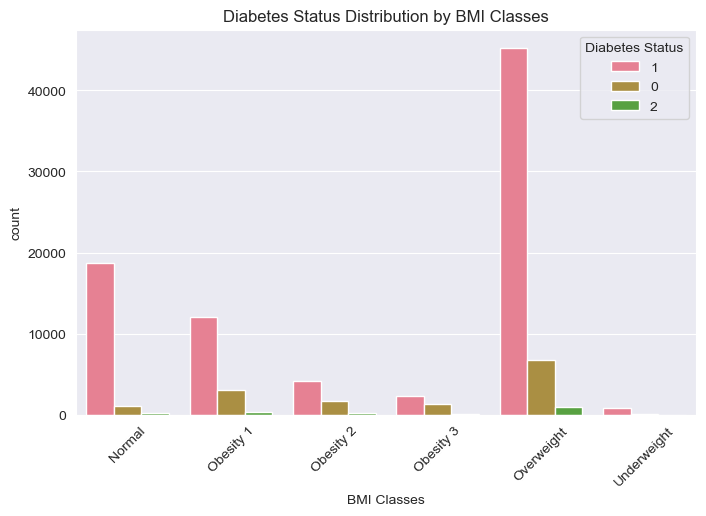

In [979]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

df=df_final

df["Diabetes Status"] = LabelEncoder().fit_transform(df["Diabetes Status"])

numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

df["Diabetes Status"] = df["Diabetes Status"].astype(str)

categorical_features = ["General Health Classes", "Age Group Classes", "BMI Classes"]

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue="Diabetes Status", data=df)
    plt.xticks(rotation=45)
    plt.title(f"Diabetes Status Distribution by {feature}")
    plt.savefig(f'countplot_{feature}.png')
    plt.show()

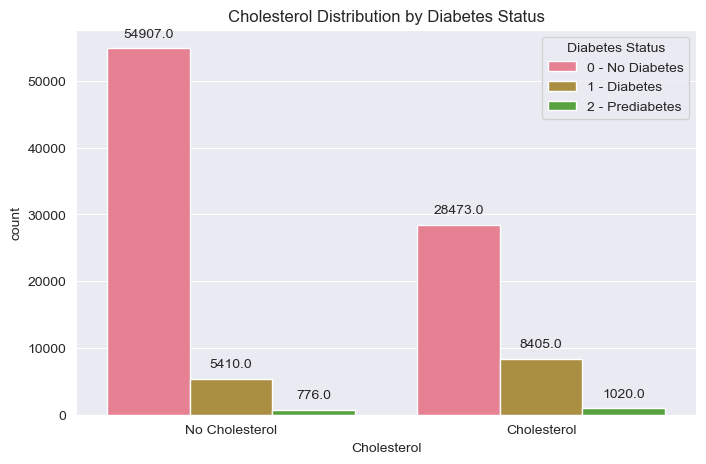

Counts for Cholesterol by Diabetes Status:
Diabetes Status     0      1     2
Cholesterol                       
0                5410  54907   776
1                8405  28473  1020


In [980]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = df_final 

df["Diabetes Status"] = df["Diabetes Status"].astype(str)

plt.figure(figsize=(8, 5))
ax = sns.countplot(x="Cholesterol", hue="Diabetes Status", data=df)
plt.xticks(ticks=[0, 1], labels=["No Cholesterol", "Cholesterol"])  # Label the x-axis
plt.title("Cholesterol Distribution by Diabetes Status")

plt.legend(title="Diabetes Status", labels=["0 - No Diabetes", "1 - Diabetes", "2 - Prediabetes"])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('countplot_cholesterol.png')
plt.savefig("cholesterol_diabetes.png")
plt.show()

# Print the counts as a table (optional)
print("Counts for Cholesterol by Diabetes Status:")
print(pd.crosstab(df["Cholesterol"], df["Diabetes Status"]))

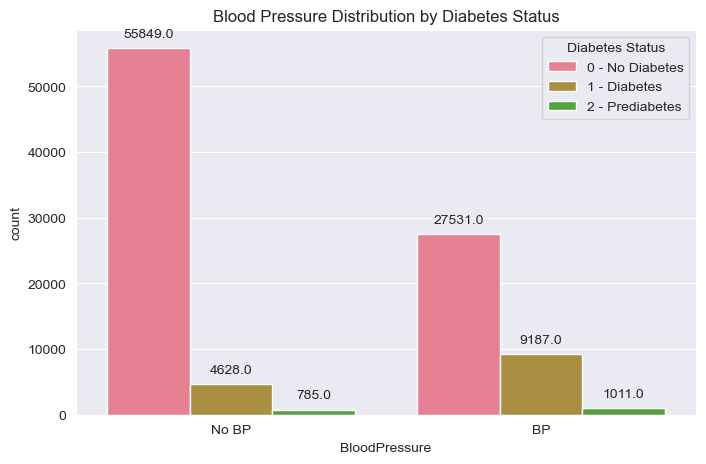

Counts for Cholesterol by Diabetes Status:
Diabetes Status     0      1     2
Cholesterol                       
0                5410  54907   776
1                8405  28473  1020


In [981]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = df_final 

df["Diabetes Status"] = df["Diabetes Status"].astype(str)

plt.figure(figsize=(8, 5))
ax = sns.countplot(x="BloodPressure", hue="Diabetes Status", data=df)
plt.xticks(ticks=[0, 1], labels=["No BP", "BP"])  # Label the x-axis
plt.title("Blood Pressure Distribution by Diabetes Status")

plt.legend(title="Diabetes Status", labels=["0 - No Diabetes", "1 - Diabetes", "2 - Prediabetes"])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('countplot_cholesterol.png')
plt.show()

print("Counts for Cholesterol by Diabetes Status:")
print(pd.crosstab(df["Cholesterol"], df["Diabetes Status"]))

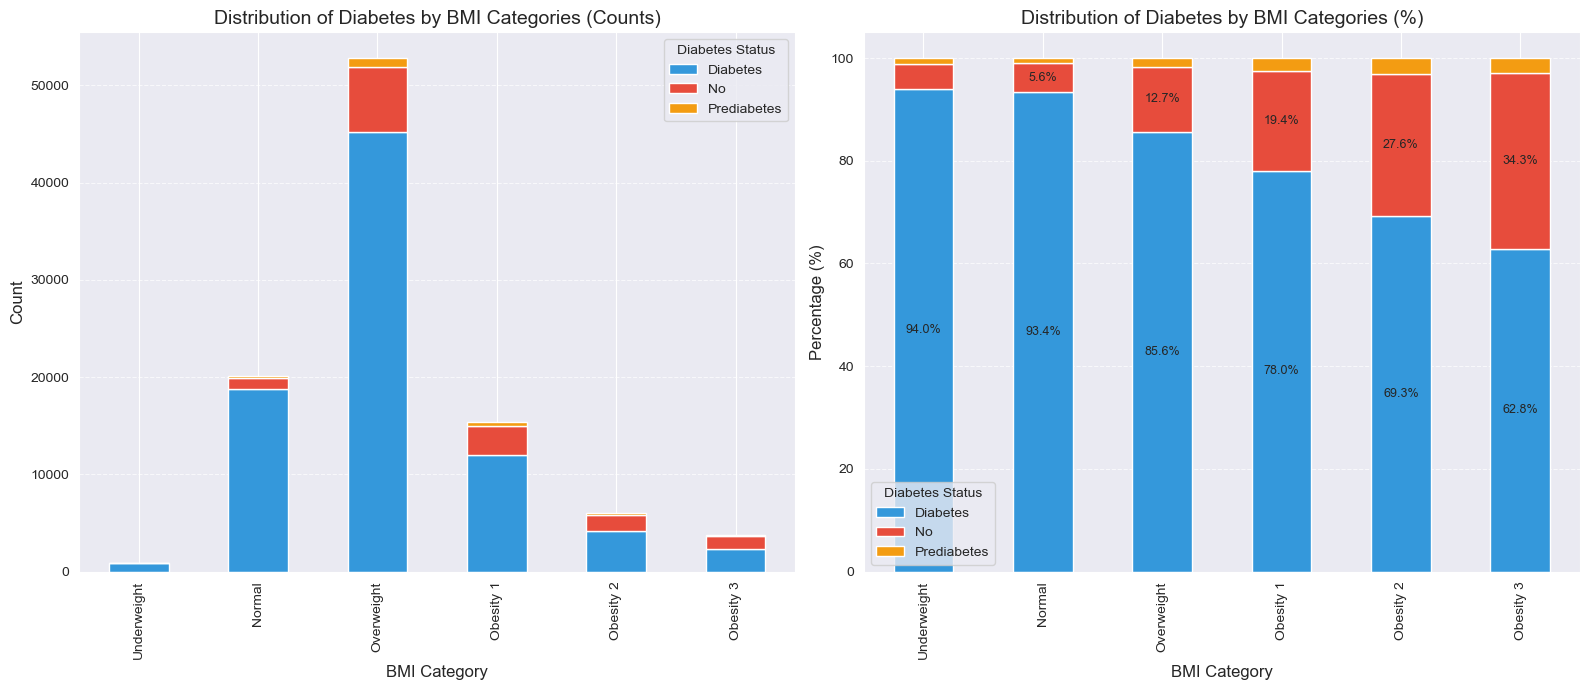

Diabetes Status Mapping:
0 → No
1 → Diabetes
2 → Prediabetes

Count of Diabetes Status by BMI Category:
Diabetes Status  Diabetes    No  Prediabetes
BMI Classes                                 
Underweight           842    44           10
Normal              18760  1125          201
Overweight          45227  6699          896
Obesity 1           12015  2991          390
Obesity 2            4169  1664          186
Obesity 3            2367  1292          113

Percentage of Diabetes Status by BMI Category:
Diabetes Status   Diabetes         No  Prediabetes
BMI Classes                                       
Underweight      93.973214   4.910714     1.116071
Normal           93.398387   5.600916     1.000697
Overweight       85.621521  12.682216     1.696263
Obesity 1        78.039751  19.427124     2.533125
Obesity 2        69.263997  27.645788     3.090214
Obesity 3        62.751856  34.252386     2.995758


<Figure size 640x480 with 0 Axes>

In [982]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

diabetes_mapping = {0: 'No', 1: 'Diabetes', 2: 'Prediabetes'}

df_final['Diabetes Status'] = df_final['Diabetes Status'].astype(int)
df_final['Diabetes Status'] = df_final['Diabetes Status'].map(diabetes_mapping)

bmi_order = ['Underweight', 'Normal', 'Overweight', 'Obesity 1', 'Obesity 2', 'Obesity 3']

cross_tab = pd.crosstab(df_final['BMI Classes'], df_final['Diabetes Status'])

cross_tab_percentage = pd.crosstab(df_final['BMI Classes'], df_final['Diabetes Status'], normalize='index') * 100

cross_tab = cross_tab.reindex(bmi_order)
cross_tab_percentage = cross_tab_percentage.reindex(bmi_order)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

colors = ['#3498db', '#e74c3c', '#f39c12']  # Blue for No, Red for Diabetes, Orange for Prediabetes

# Plot 1: Count distribution
cross_tab.plot(kind='bar', stacked=True, ax=ax1, color=colors)
ax1.set_title('Distribution of Diabetes by BMI Categories (Counts)', fontsize=14)
ax1.set_xlabel('BMI Category', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.legend(title='Diabetes Status')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Percentage distribution
cross_tab_percentage.plot(kind='bar', stacked=True, ax=ax2, color=colors)
ax2.set_title('Distribution of Diabetes by BMI Categories (%)', fontsize=14)
ax2.set_xlabel('BMI Category', fontsize=12)
ax2.set_ylabel('Percentage (%)', fontsize=12)
ax2.legend(title='Diabetes Status')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

for i, p in enumerate(ax2.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 5:  # Only show percentage if it's more than 5%
        ax2.annotate(f'{height:.1f}%', (x + width/2, y + height/2), 
                    ha='center', va='center', fontsize=9)

plt.tight_layout()
plt.show()
plt.savefig('bmi_diabetes.png')

print("Diabetes Status Mapping:")
print("0 → No")
print("1 → Diabetes")
print("2 → Prediabetes")

print("\nCount of Diabetes Status by BMI Category:")
print(cross_tab)
print("\nPercentage of Diabetes Status by BMI Category:")
print(cross_tab_percentage)